## #1  Import data

Krenn score: total synovitis score (Numerical score from 0=no synovitis to 9=highest grade synovitis)   
Subitems composing the Krenn score as follows: Numerical score from 0 to 3 for different tissue features as follows:  
  Krenn A=Synovial hyperplasia,  
  Krenn B: Stromal density and  
  Krenn C: Inflammatory infiltrate    
  Semiquantitative features of synovial tissue composition at H&E staining with 1=presence and 0=absence of lymphocytes,  plasmacells, granulocytes and tissue oedema.  

All these features are derived from Hematoxylin and Eosin staining.


In [ ]:
import pandas as pd 

# Extended_Dataset_SyG_Naive_pattern_29062024.csv
df_syg = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/Extended_Dataset_SyG_Naive_pattern_29062024.csv', sep=';')
df_syg.head()

### #1.2 Preprocessing

#### Rename columns

In [ ]:
d_remap = {
   'Pt_ID_SyG' : 'pseudoId',
   'Gender_0Male_1Female' : 'Sex',
   'ACPA_positivity_0NEG_1POS' : 'aCCP',
   'RFIgM_0NEG_1POS' : 'RF',
   'WBC ' : 'Leuko', 
   'HB g/dL' : 'Hb',
   'MCV FL ' : 'MCV',
    'PLT ' : 'Trom',
    'ESR_mm/1st_hour' : 'BSE',
    'Age_yrs' : 'Age',
}

df_syg = df_syg.rename(columns=d_remap)
df_syg

### #1.2.2 Identify patients with missing or low quality data

In [ ]:
import numpy as np
l_col = ['pseudoId', 'Age', 'Sex', 'aCCP', 'RF',
       'BSE', 'Hb', 'RBC ', 'MCV', 'Trom', 'Leuko', 'MONO ', 'LYMPHO ',
       'S_Wrist_R', 'S_Wrist_L',
       'S_Knee_R', 'S_Knee_L', 'S_Ankle_R', 'S_Ankle_L', 
       'S_Elbow_R', 'S_Elbow_L', 'S_Shoulder_R', 'S_Shoulder_L', 'T_Wrist_R',
       'T_Wrist_L', 'T_Knee_R',  'T_Knee_L', 'T_Ankle_R', 'T_Ankle_L',  'T_Elbow_R',
       'T_Elbow_L', 'T_Shoulder_R', 'T_Shoulder_L', 'T_Hip_R', 'T_Hip_L',
       'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
       'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
       'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
       'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
       'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
       'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
       'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
       'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
       'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
       'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
       'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
       'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5']

# =SyG_358 has Hb of 1,3,5?!
df_syg['Hb'] = df_syg['Hb'].replace("1,3,5", np.nan) 

# SyG_362 has aCCP of 21?!
df_syg['aCCP'] = df_syg['aCCP'].replace(21, np.nan)

# SyG_279 is missing RF 
df_syg[df_syg[l_col].isna().any(axis=1)][l_col]


#### 1.2.3 Remove patients

In [ ]:
df_syg = df_syg.dropna(subset=l_col)
df_syg = df_syg.reset_index(drop=True)
df_syg

#### 1.2.2 replace commas with dots

In [ ]:
# Replace comma with dot 
l_convert = ['Leuko', 'Hb', 'MCV', 'Trom', 'BSE', 'DAS28_T0_at_biopsy']

for col in l_convert: 
    print(col)
    df_syg[col] = df_syg[col].str.replace(',', '.').astype(float)


#### 1.2.3 export data

In [8]:
l_selection = ['pseudoId', 'Age', 'Sex', 'AutoAb_positivity_0NEG_1POS', 'aCCP', 'RF',
       'BSE', 'Hb', 'RBC ', 'MCV', 'Trom', 'Leuko', 'MONO ', 'LYMPHO ',
       'S_Wrist_R', 'S_Wrist_L',
       'S_Knee_R', 'S_Knee_L', 'S_Ankle_R', 'S_Ankle_L', 
       'S_Elbow_R', 'S_Elbow_L', 'S_Shoulder_R', 'S_Shoulder_L', 'T_Wrist_R',
       'T_Wrist_L',  'T_Knee_R',
       'T_Knee_L', 'T_Ankle_R', 'T_Ankle_L', 'T_Elbow_R',
       'T_Elbow_L', 'T_Shoulder_R', 'T_Shoulder_L', 'T_Hip_R', 'T_Hip_L',
       'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
       'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
       'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
       'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
       'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
       'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
       'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
       'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
       'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
       'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
       'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
       'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5',
       'DAS28_T0_at_biopsy', 'disease activity',
       'Low_Disease_Activity_T6_0NO_1YES', 'DAS_REM_T6_0NO_1YES',
       'Boolean_rem_T6_0NO_1YES', 'Biopsied Joint', 'KRENN SCORE_TOT',
       'KRENN_A_Synovial_hyperplasia', 'KRENN_B_Stromal_density',
       'KRENN_C_Inflammatory_infiltrate', 'Lymphocytes_presence_0NO_1YES',
       'Plasmacells_presence_0NO_1YES', 'Granulocytes_presence_0NO_1YES',
       'Tissue_oedema_presence_0NO_1YES']

# export metadata
df_syg[l_selection].to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_metadata.csv', sep='|', index=None)

### #1.2.4 Reformat mannequin from developmental data

In [9]:
# Mapping HIX-cods to ERC
d_hix_to_erc = { 
                # Remap MCP 
                'Zwelling_mcp 1 rechts_positive' :  'S_MCP_R1',
                'Zwelling_mcp 2 rechts_positive' : 'S_MCP_R2',
                'Zwelling_mcp 3 rechts_positive' : 'S_MCP_R3',
                'Zwelling_mcp 4 rechts_positive' : 'S_MCP_R4',
                'Zwelling_mcp 5 rechts_positive' : 'S_MCP_R5', 
                'Zwelling_mcp 1 links_positive' : 'S_MCP_L1',
                'Zwelling_mcp 2 links_positive' : 'S_MCP_L2',
                'Zwelling_mcp 3 links_positive' : 'S_MCP_L3',
                'Zwelling_mcp 4 links_positive' : 'S_MCP_L4',
                'Zwelling_mcp 5 links_positive' : 'S_MCP_L5',
                'Pijn_mcp 1 rechts_positive' :  'T_MCP_R1',
                'Pijn_mcp 2 rechts_positive' :  'T_MCP_R2',
                'Pijn_mcp 3 rechts_positive' :  'T_MCP_R3',
                'Pijn_mcp 4 rechts_positive' :  'T_MCP_R4',
                'Pijn_mcp 5 rechts_positive' :  'T_MCP_R5',
                'Pijn_mcp 1 links_positive'  :  'T_MCP_L1',
                'Pijn_mcp 2 links_positive'  :  'T_MCP_L2',
                'Pijn_mcp 3 links_positive'  :  'T_MCP_L3',
                'Pijn_mcp 4 links_positive'  :  'T_MCP_L4',
                'Pijn_mcp 5 links_positive'  :  'T_MCP_L5',
                    
                # Remap PIP 
                'Zwelling_IP rechts_positive': 'S_PIP_R1', # Assumption 
                'Zwelling_pip 2 rechts hand_positive' : 'S_PIP_R2',
                'Zwelling_pip 3 rechts hand_positive' : 'S_PIP_R3',
                'Zwelling_pip 4 rechts hand_positive' : 'S_PIP_R4',
                'Zwelling_pip 5 rechts hand_positive' : 'S_PIP_R5',
                'Zwelling_IP links_positive': 'S_PIP_L1', # Assumption 
                'Zwelling_pip 2 links hand_positive' : 'S_PIP_L2',
                'Zwelling_pip 3 links hand_positive' : 'S_PIP_L3',
                'Zwelling_pip 4 links hand_positive' : 'S_PIP_L4',
                'Zwelling_pip 5 links hand_positive' : 'S_PIP_L5',
                'Pijn_IP rechts_positive' : 'T_PIP_R1', # Assumption 
                'Pijn_pip 2 rechts hand_positive' : 'T_PIP_R2',
                'Pijn_pip 3 rechts hand_positive' : 'T_PIP_R3', 
                'Pijn_pip 4 rechts hand_positive' : 'T_PIP_R4', 
                'Pijn_pip 5 rechts hand_positive' : 'T_PIP_R5',
                'Pijn_IP links_positive' : 'T_PIP_L1', # Assumption 
                'Pijn_pip 2 links hand_positive' : 'T_PIP_L2', 
                'Pijn_pip 3 links hand_positive' : 'T_PIP_L3', 
                'Pijn_pip 4 links hand_positive' : 'T_PIP_L4',
                'Pijn_pip 5 links hand_positive' : 'T_PIP_L5',
    
                 # Remap MTP 
                'Zwelling_mtp 1 rechts_positive' : 'S_MTP_R1',
                'Zwelling_mtp 2 rechts_positive' : 'S_MTP_R2',
                'Zwelling_mtp 3 rechts_positive' : 'S_MTP_R3',
                'Zwelling_mtp 4 rechts_positive' : 'S_MTP_R4',
                'Zwelling_mtp 5 rechts_positive' : 'S_MTP_R5',
                'Zwelling_mtp 1 links_positive' : 'S_MTP_L1',
                'Zwelling_mtp 2 links_positive' : 'S_MTP_L2', 
                'Zwelling_mtp 3 links_positive' : 'S_MTP_L3',
                'Zwelling_mtp 4 links_positive' : 'S_MTP_L4',
                'Zwelling_mtp 5 links_positive' : 'S_MTP_L5',
                'Pijn_mtp 1 rechts_positive' : 'T_MTP_R1',
                'Pijn_mtp 2 rechts_positive' : 'T_MTP_R2', 
                'Pijn_mtp 3 rechts_positive' : 'T_MTP_R3',
                'Pijn_mtp 4 rechts_positive' : 'T_MTP_R4',
                'Pijn_mtp 5 rechts_positive' : 'T_MTP_R5',
                'Pijn_mtp 1 links_positive' : 'T_MTP_L1',
                'Pijn_mtp 2 links_positive' : 'T_MTP_L2',
                'Pijn_mtp 3 links_positive' : 'T_MTP_L3',
                'Pijn_mtp 4 links_positive' : 'T_MTP_L4', 
                'Pijn_mtp 5 links_positive' : 'T_MTP_L5'
               }



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler # Z-score
from sklearn.preprocessing import RobustScaler  # Robust Z-score
from sklearn.preprocessing import PowerTransformer # Yeo-Johnson
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

l_num = ['pseudoId', 'Leuko', 'Hb', 'MCV', 'Trom', 'BSE', 'Age']
l_categorical = ['pseudoId', 'RF', 'aCCP', 'Sex']
l_mannequin = [  'S_Wrist_R', 'S_Wrist_L', 'T_Wrist_R', 'T_Wrist_L', 
                'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
                'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
                'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
                'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
                'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
                'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
                'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
                'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
                'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
                'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
                'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
                'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5',
                'S_Knee_R', 'S_Knee_L', 'T_Knee_R', 'T_Knee_L',
                'S_Ankle_R', 'S_Ankle_L', 'T_Ankle_R','T_Ankle_L',
                'S_Elbow_R', 'S_Elbow_L', 'T_Elbow_R', 'T_Elbow_L',
                'S_Shoulder_R', 'S_Shoulder_L', 'T_Shoulder_R', 'T_Shoulder_L',
                'T_Hip_R', 'T_Hip_L'
                ]

l_categorical.extend(l_mannequin)

# Import developmental data
df_categoric= pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/5_clustering/df_categoric.csv', sep=',')

# Reduce information -> to match Stephano's data

## Reformat features
df_categoric['S_Wrist_R'] = df_categoric['Zwelling_pols R_positive'].copy()
df_categoric['S_Wrist_L'] = df_categoric['Zwelling_pols L_positive'].copy()
df_categoric['T_Wrist_R'] = df_categoric['Pijn_pols R_positive'].copy()
df_categoric['T_Wrist_L'] = df_categoric['Pijn_pols L_positive'].copy()

df_categoric['S_MCP_R'] = df_categoric[['Zwelling_mcp 1 rechts_positive','Zwelling_mcp 2 rechts_positive','Zwelling_mcp 3 rechts_positive','Zwelling_mcp 4 rechts_positive','Zwelling_mcp 5 rechts_positive']].any(axis=1).astype(int)
df_categoric['S_MCP_L'] = df_categoric[['Zwelling_mcp 1 links_positive','Zwelling_mcp 2 links_positive','Zwelling_mcp 3 links_positive','Zwelling_mcp 4 links_positive','Zwelling_mcp 5 links_positive']].any(axis=1).astype(int)
df_categoric['T_MCP_R'] = df_categoric[['Pijn_mcp 1 rechts_positive','Pijn_mcp 2 rechts_positive','Pijn_mcp 3 rechts_positive','Pijn_mcp 4 rechts_positive','Pijn_mcp 5 rechts_positive']].any(axis=1).astype(int)
df_categoric['T_MCP_L'] = df_categoric[['Pijn_mcp 1 links_positive','Pijn_mcp 2 links_positive','Pijn_mcp 3 links_positive','Pijn_mcp 4 links_positive','Pijn_mcp 5 links_positive']].any(axis=1).astype(int)

df_categoric['S_PIP_R'] =  df_categoric[['Zwelling_pip 2 rechts hand_positive','Zwelling_pip 3 rechts hand_positive','Zwelling_pip 4 rechts hand_positive','Zwelling_pip 5 rechts hand_positive']].any(axis=1).astype(int)
df_categoric['S_PIP_L'] =  df_categoric[['Zwelling_pip 2 links hand_positive', 'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 5 links hand_positive']].any(axis=1).astype(int)
df_categoric['T_PIP_R'] =  df_categoric[['Pijn_pip 2 rechts hand_positive','Pijn_pip 3 rechts hand_positive','Pijn_pip 4 rechts hand_positive','Pijn_pip 5 rechts hand_positive']].any(axis=1).astype(int)
df_categoric['T_PIP_L'] =  df_categoric[['Pijn_pip 2 links hand_positive','Pijn_pip 3 links hand_positive','Pijn_pip 4 links hand_positive','Pijn_pip 5 links hand_positive']].any(axis=1).astype(int)

df_categoric['S_Knee_R'] = df_categoric['Zwelling_knie rechts_positive'].copy()
df_categoric['S_Knee_L'] = df_categoric['Zwelling_knie links_positive'].copy()
df_categoric['T_Knee_R'] = df_categoric['Pijn_knie rechts_positive'].copy()
df_categoric['T_Knee_L'] = df_categoric['Pijn_knie links_positive'].copy()

df_categoric['S_Ankle_R'] = df_categoric['Zwelling_bovenste spronggewricht rechts_positive'].copy()
df_categoric['S_Ankle_L'] = df_categoric['Zwelling_bovenste spronggewicht links_positive'].copy()
df_categoric['T_Ankle_R'] = df_categoric['Pijn_bovenste spronggewricht rechts_positive'].copy()
df_categoric['T_Ankle_L'] = df_categoric['Pijn_bovenste spronggewicht links_positive'].copy()

df_categoric['S_MTP_R'] =  df_categoric[['Zwelling_mtp 1 rechts_positive','Zwelling_mtp 2 rechts_positive','Zwelling_mtp 3 rechts_positive','Zwelling_mtp 4 rechts_positive','Zwelling_mtp 5 rechts_positive']].any(axis=1).astype(int)
df_categoric['S_MTP_L'] =  df_categoric[['Zwelling_mtp 1 links_positive','Zwelling_mtp 2 links_positive','Zwelling_mtp 3 links_positive','Zwelling_mtp 4 links_positive','Zwelling_mtp 5 links_positive']].any(axis=1).astype(int)
df_categoric['T_MTP_R'] =  df_categoric[['Pijn_mtp 1 rechts_positive','Pijn_mtp 2 rechts_positive','Pijn_mtp 3 rechts_positive','Pijn_mtp 4 rechts_positive','Pijn_mtp 5 rechts_positive']].any(axis=1).astype(int)
df_categoric['T_MTP_L'] =  df_categoric[['Pijn_mtp 1 links_positive','Pijn_mtp 2 links_positive','Pijn_mtp 3 links_positive','Pijn_mtp 4 links_positive','Pijn_mtp 5 links_positive']].any(axis=1).astype(int)

df_categoric['S_Elbow_R'] = df_categoric['Zwelling_elleboog R_positive'].copy()
df_categoric['S_Elbow_L'] = df_categoric['Zwelling_Elleboog L_positive'].copy()
df_categoric['T_Elbow_R'] = df_categoric['Pijn_elleboog R_positive'].copy()
df_categoric['T_Elbow_L'] = df_categoric['Pijn_Elleboog L_positive'].copy()

df_categoric['S_Shoulder_R'] = df_categoric['Zwelling_schouder R_positive'].copy()
df_categoric['S_Shoulder_L'] = df_categoric['Zwelling_schouder L_positive'].copy()
df_categoric['T_Shoulder_R'] = df_categoric['Pijn_schouder R_positive'].copy()
df_categoric['T_Shoulder_L'] = df_categoric['Pijn_schouder L_positive'].copy()

# Note: Stephano's data only has registered Tenderness for Hip (not Swelling)
df_categoric['T_Hip_R'] = df_categoric['Pijn_heup rechts_positive'].copy()
df_categoric['T_Hip_L'] = df_categoric['Pijn_heup links_positive'].copy()

# Rename final columns
df_categoric = df_categoric.rename(columns = d_hix_to_erc)

df_categoric[l_categorical].to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/df_categoric.csv', sep=',', index=None)

# Subset on mannequin data
new_df = df_categoric[l_categorical].copy()

# Perform OHE
def cast_to_one_hot(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    df = pd.DataFrame(onehot_encoded, columns=[0, 1])
    df.index = np.arange(0, len(df))
    return df[0], df[1]

for cat in l_mannequin:
    # Easy fix: Cap at 1 
    if len(new_df[cat].unique())> 2:
        print('Headsup: there are more than 2 possibilities for column "%s" which is supposed to be binary' % cat)
    new_df[cat] = new_df[cat].apply(lambda x: 1 if x>=1 else 0)
    # If the column is non-informative
    if len(new_df[cat].unique()) == 1:
        if new_df[cat].iloc[0] == 0:
            new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = 1, 0
        else : 
            new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = 0, 1
        new_df = new_df.drop(columns=cat)
    else :
        new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = cast_to_one_hot(new_df[cat].values)
        new_df = new_df.drop(columns=cat)
        
new_df.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/df_categoric_ohe.csv', sep='|', index=False)
new_df.head()

### #1.2.5 Normalize lab of the Syg data

In [ ]:
def BinarizeSerology(val, include_na=True):
    """
    Standardize the categorical variables to numerical values
    
    where:
        0 = Negative
        1 = Positive
        2 = Missing
    
    Input:
        val = Categorical value 
        include_na = whether or to include missing values
            - in case the missingness contains information
            - you should keep these values!
    Output:
        val = codified categorical value
    """
    
    if val in ['Positief', 'Sterk pos.', 'Sterk pos', 'Sterk Positief']:
        val = 1
    elif val in ['Dubieus', 'Negatief', 'Zwak pos.', 'Zwak pos', 'Zwak Positief']:
        val= 0
    elif include_na:
        if val in ['Onbekend', 'Stopgezet', '-volgt-', '@volgt', 'Niet doorgeg', 'Niet het jui', 
                   'gestopt', 'Bepaling niet ui', ' ', 'Geen analyse mog', 'Te weinig materi', 
                   'Geen materiaal o', 'te weinig ma', 'gestopt',  'Geen analyse', 'geen uitslag', np.nan]:
            val = np.nan
    return val

def normalizeLab(df):
    """
    Input: 
        df = complete dataframe
    
    Description:
        This function processes the Lab data. 
        Categorical data is subjected to a one-hot-encoding
        while the numerical data is cast to a z-scale as normalization
        
        Furthermore, the ESR (or BSE in dutch) is subjected to a 
        log-transformation.
    
    Output:
        df_dummies = dataframe with preprocessed categorical data 
        df_b = dataframe with preprocessed numerical data
    """
    l_num = ['Leuko','Hb', 'MCV', 'Trom', 'BSE', 'Age'] # 'BSE', 'Lym', 'Mono', 'MCH', 'Ht', 'MCHC', 'MCV',
    
    # Log transform the ESR data
    df['BSE'] = np.log(df['BSE'])
    
    ct = ColumnTransformer([("num", PowerTransformer(), l_num)], remainder="passthrough")
    df_num= pd.DataFrame(ct.fit_transform(df[l_num]), columns=l_num)
    return df_num.merge(df['pseudoId'], left_index=True, right_index=True)

# Define df lab
df_lab= df_syg[l_num].copy()

# Save lab data (unnormalized)
df_lab.to_csv(r'/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Lab_wide_unscaled.csv', sep='|', index=False)
print('Written to ../new_data/offshoots/ERC_SyG/SyG_Lab_wide_unscaled.csv')

# Normalize lab values
df_lab_sc = normalizeLab(df_lab.copy())

# Save lab data (normalized)
df_lab_sc.to_csv(r'/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Lab_wide_scaled.csv', sep='|', index=False)
df_lab_sc.head()

### #1.5 Perform one hot encoding

In [ ]:
# Subset on mannequin data
new_df = df_syg[l_categorical].copy()

# Perform OHE
def cast_to_one_hot(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    df = pd.DataFrame(onehot_encoded, columns=[0, 1])
    df.index = np.arange(0, len(df))
    return df[0], df[1]

for cat in l_mannequin:
    # Easy fix: Cap at 1 
    if len(new_df[cat].unique())> 2:
        print('Headsup: there are more than 2 possibilities for column "%s" which is supposed to be binary' % cat)
    new_df[cat] = new_df[cat].apply(lambda x: 1 if x>=1 else 0)
    # If the column is non-informative
    if len(new_df[cat].unique()) == 1:
        if new_df[cat].iloc[0] == 0:
            new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = 1, 0
        else : 
            new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = 0, 1
        new_df = new_df.drop(columns=cat)
    else :
        new_df['%s_negative' % (cat)], new_df['%s_positive' % (cat)] = cast_to_one_hot(new_df[cat].values)
        new_df = new_df.drop(columns=cat)
        

new_df.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_categoric_ohe.csv', sep='|', index=False)
new_df.head()

## #3. Project new data

Load different custom env: 
conda activate /exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/

### #3.1 Force same dimensions
We have less caterogical features in the replication set, thus we are required to reduce the dimensions. In order to create a shared latent space in the next step

In [2]:
import pandas as pd

l_num = ['pseudoId', 'Leuko', 'Hb', 'MCV', 'Trom', 'BSE', 'Age']

# Variables from development set
df_numeric = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/5_clustering/df_lab_scaled_demographics.csv', sep=',')[l_num]
df_categoric= pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/df_categoric_ohe.csv', sep='|')

# Variables from replication set
df_categoric_replication = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_categoric_ohe.csv', sep='|')[list(df_categoric.columns)]
df_numeric_replication = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Lab_wide_scaled.csv', sep='|')[l_num]


In [3]:
print('|CATEGORICAL|')
print('BEFORE: Columns: LUMC set (n=%s) vs Stephano set (n=%s) ' % (len(df_categoric.columns), len(df_categoric_replication.columns)))

# Only keep categorical variables that are also in the replication set!
l_cat = [col for col in df_categoric.columns if col in df_categoric_replication.columns]

# Remove (pseudo) identifiers
l_cat = [col for col in l_cat if col not in ['FirstConsult', 'PATNR', 'pseudoId']]

# Remove (pseudo) identifiers
l_num = [col for col in l_num if col not in ['FirstConsult', 'PATNR', 'pseudoId']]

df_categoric = df_categoric[l_cat].copy()
df_categoric_replication = df_categoric_replication[l_cat].copy()
             
print('AFTER: Columns: development set (n=%s) vs replication set (n=%s) ' % (len(df_categoric.columns), len(df_categoric_replication.columns)))

df_numeric = df_numeric[l_num].copy()
df_numeric_replication = df_numeric_replication[l_num].copy()

# Original clustering information (same samples as development set)

|CATEGORICAL|
BEFORE: Columns: LUMC set (n=168) vs Stephano set (n=168) 
AFTER: Columns: development set (n=167) vs replication set (n=167) 


### #2.2 learn shared product space

In [4]:
import os, platform, subprocess, re

def get_processor_name():
    if platform.system() == "Windows":
        return platform.processor()
    elif platform.system() == "Darwin":
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin'
        command ="sysctl -n machdep.cpu.brand_string"
        return subprocess.check_output(command).strip()
    elif platform.system() == "Linux":
        command = "cat /proc/cpuinfo"
        all_info = subprocess.check_output(command, shell=True).decode().strip()
        for line in all_info.split("\n"):
            if "model name" in line:
                return re.sub( ".*model name.*:", "", line,1)
    return ""

get_processor_name()

' Intel(R) Xeon(R) CPU E5-2690 v3 @ 2.60GHz'

In [ ]:
import time
import numpy as np
from mmae.multimodal_autoencoder import MultimodalAutoencoder # MMAE
import tensorflow as tf

# Build the model on Original set

input_shapes = {'Categoric': df_categoric.shape[1:], 'Numeric': df_numeric.shape[1:]} 
data = [np.array(df_categoric.values), np.array(df_numeric.values)]

# Number of units of each layer of encoder network
hidden_dims = [128, 64, 8] # 16?
# Output activation functions for each modality
output_activations = ['sigmoid' , 'relu']
# Name of Keras optimizer
optimizer = 'adam'
# Loss functions corresponding to a noise model for each modality
loss = ['bernoulli_divergence', 'gaussian_divergence']

# Set seed
tf.random.set_seed(20240709) 

# Construct autoencoder network
autoencoder = MultimodalAutoencoder(input_shapes, hidden_dims,
                                    output_activations)
autoencoder.compile(optimizer, loss)


t0 = time.time()
# Train model where input and output are the same
history = autoencoder.fit(data, epochs=100, validation_split=0.2) # validation_data=validation_data # or 5000

t1 = time.time()
print('Time to create product space: ' + str(t1-t0))


# Get Latent space of original data
z_filtered = autoencoder.encode(data)
autoencoder.save('/exports/reum/tdmaarseveen/RA_Clustering/models/SyG_MMAE')

# Save shared productspace (that only uses variables also present in replication set)
l_embedding = ['pseudoId']

df_z = pd.DataFrame(z_filtered)
for ix, col in enumerate(df_z): # z-filtered might be row based
    df_z['LF%s' % ix] = df_z[ix].copy()
    l_embedding.append('LF%s' % ix)
 
metadata_RA = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/MMAE_clustering_270.csv', index_col=0)
df_z.insert(0, 'pseudoId', metadata_RA['pseudoId'])
df_z = df_z[l_embedding].copy()
   
df_z[l_embedding].to_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding.csv', index=False, sep=',')


### 2.3 Create metadata for combined set

In [ ]:
# import metadata of SyG replication set
metadata_rep = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_metadata.csv', sep='|')
metadata_rep['Replication'] = 1

# import metadata of development set
metadata_RA = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/MMAE_clustering_270.csv', index_col=0) #  pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/5_clustering/df_metadata.csv')
metadata_RA['Replication'] = 0
l_no_man = [x for x in metadata_RA.columns if ('Pijn' not in x and 'Zwelling' not in x)]

# Exclude old mannequin variables
metadata_RA = metadata_RA[l_no_man].copy()

# Add new mannequin variables
df_new_mann = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/df_categoric.csv', sep=',')
l_new_mann = [x for x in df_new_mann.columns if ('S_' in x or 'T_' in x or 'pseudo' in x)]
metadata_RA = metadata_RA.merge(df_new_mann[l_new_mann], on='pseudoId', how='left') 

# Combine both metadatas
metadata_Full = metadata_RA.append(metadata_rep, ignore_index = True)

# Export 
metadata_Full.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/Metadata_complete.csv', index=False)
metadata_Full.head()

### #2.2 Project novel instances onto latent embedding


In [ ]:
import sys
sys.path.append(r'../../../src/1_emr_scripts')
import Visualization as func
from sklearn.manifold import TSNE

# --------------------------------- Add new patients ---------------------------------------------
model=tf.keras.models.load_model('/exports/reum/tdmaarseveen/RA_Clustering/models/SyG_MMAE', compile=False)

# Project new sample in product space

metadata_rep = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_metadata.csv', sep='|')
#z_patient = maui_model.transform({ 'Categorical': df_categoric_replication.T, 'Lab_numerical': df_numeric_replication.T})
lcat = [col for col in df_categoric_replication.columns if col not in ['pseudoId']]
data = [np.array(df_categoric_replication[lcat].values), np.array(df_numeric_replication.values)]

z_patient = model.encoder.predict(data, batch_size=256)
z_patient = pd.DataFrame(z_patient)

l_embedding = ['pseudoId']
for ix, col in enumerate(z_patient): # z-filtered might be row based
    z_patient['LF%s' % ix] = z_patient[ix].copy()
    l_embedding.append('LF%s' % ix)

z_patient.insert(0, 'pseudoId', metadata_rep['pseudoId'])

# Add new patient to product space
df_z = df_z.append(z_patient[l_embedding], ignore_index = True)

# --------------------------------- Add new patients ---------------------------------------------

# Create interactive TSNE with metadata
X_embedded = TSNE(n_components=2, random_state=7062021).fit_transform(df_z[df_z.columns[1:]])


# Open metadata
df_imp = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/Metadata_complete.csv')
df_imp['patnr'] = range(len(df_imp))


# Get more insight by visualizing the ratios
df_imp['Swollen ratio'] = df_imp['SJC'] / (df_imp['SJC']+df_imp['TJC'])
df_imp['Swollen ratio'] = df_imp['Swollen ratio'].fillna(0)

df_imp['Tender ratio'] = df_imp['TJC'] / (df_imp['SJC']+df_imp['TJC'])
df_imp['Tender ratio'] = df_imp['Tender ratio'].fillna(0)

df_imp['Big ratio'] = df_imp['Big joints'] / (df_imp['TJC']+df_imp['SJC'])
df_imp['Big ratio'] = df_imp['Big ratio'].fillna(0)

df_imp['Small ratio'] = df_imp['Small joints'] / (df_imp['TJC']+df_imp['SJC'])
df_imp['Small ratio'] = df_imp['Small ratio'].fillna(0)

df_imp['Symmetrical ratio'] = df_imp['Symmetrical joints'] / (df_imp['TJC']+df_imp['SJC'])
df_imp['Symmetrical ratio'] = df_imp['Symmetrical ratio'].fillna(0)

# write coordinates embedding
df_imp['coor_x'] = X_embedded[:, 0]
df_imp['coor_y'] = X_embedded[:, 1]

# update column
df_imp['pseudoId'] = df_z['pseudoId'].copy()

# Save embedding + projection
df_z.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding_projections.csv', index=False, sep=',')


func.visualize_umap_bokeh_na_2(X_embedded, df_imp, list(df_imp.columns), l_binary=l_cat, patient_id='pseudoId', cluster_id='RF', title='MMAE_UMAP',  path='/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Set_MMAE.html')

## #4 Classify novel instances (POODLE)

### #4.1 Initialize variables for patient assignment

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

df_cluster = metadata_RA[['pseudoId','PhenoGraph_clusters']].copy()

# Construct patient similarity matrix from original set
sim_matrix = cosine_similarity(z_filtered.astype(np.float32))

# Specify columns for each modality (need to be present in both original & replication space)
d_input = {'cat' : list(df_categoric_replication.columns), 'num' : list(df_numeric_replication.columns)}

# Intialize list to save location of newly projected patients
z_new = []

# Define cluster
CLUSTER_LABEL = 'PhenoGraph_clusters'

# Initialize dataframe where we collect all predictors of interest for assigning patients to a cluster 
archetype_columns = ['weight_pval', 'weight_mean', 'weight_sd', 'cluster_mean_pat', 'cluster_sd_pat'] # + latent factors?
l_col = ['pseudoId', CLUSTER_LABEL]
for i in range(len(np.unique(df_cluster[CLUSTER_LABEL]))):
    l_col.extend(['%s_%s' % (col, i) for col in archetype_columns ])

df_characteristics = pd.DataFrame(columns=l_col)

### #4.2 Project the patients onto latent space and see how they are oriented

In [178]:
import sys
sys.path.append(r'/exports/reum/tdmaarseveen/Poodle')
from poodle import utils as pup
import importlib as imp
imp.reload(pup)
np.seterr('raise') # reveal potential floating point errors

# Bookmark identifier (use fake)
df_id = pd.DataFrame({'pseudoId' : ['id_' + str(i) for i in range(len(df_numeric_replication))]})

for ix, new_pat in enumerate(df_id['pseudoId']):
    # collect sample information
    new_pat = str(df_id.iloc[ix]['pseudoId'])
    sample_cat = df_categoric_replication.iloc[ix]
    sample_num = df_numeric_replication.iloc[ix]
    #sample =  sample_cat.append(sample_num)
    sample = pd.concat([sample_cat, sample_num], axis=0)
    sample.name = new_pat

    # create metadata
    df_meta = pup.getMetaDataPatient(df_cluster, list(df_cluster['pseudoId'].values), new_pat)
    
    l_orientation = [df_id.iloc[ix]['pseudoId'], -1]
    
    # What is the orientation of the patient compared to each cluster
    # In other words, which cluster has the largest gravity on the patient
    l_orientation.extend(pup.getOrientation(autoencoder, df_meta, pd.DataFrame(z_filtered), d_input, sample, sim_matrix=sim_matrix, cluster_label='PhenoGraph_clusters'))

    # Bookmark cluster characteristics
    df_characteristics.loc[len(df_characteristics)] = l_orientation
    
df_characteristics['pseudoId'] = df_id['pseudoId'].copy()
df_characteristics.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterCharacteristics_Projection_SyG.csv', index=False, sep=',')
df_characteristics.head()

,pseudoId,PhenoGraph_clusters,weight_pval_0,weight_mean_0,weight_sd_0,cluster_mean_pat_0,cluster_sd_pat_0,weight_pval_1,weight_mean_1,weight_sd_1,...,weight_pval_2,weight_mean_2,weight_sd_2,cluster_mean_pat_2,cluster_sd_pat_2,weight_pval_3,weight_mean_3,weight_sd_3,cluster_mean_pat_3,cluster_sd_pat_3
0,id_0,-1,0.000001,0.882775,0.077963,0.785578,0.093512,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.786863,0.079472,0.000001,0.767556,0.138172,0.644621,0.149679
1,id_1,-1,0.000001,0.882775,0.077963,0.839908,0.074802,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.853962,0.063203,0.000001,0.767556,0.138172,0.726774,0.120305
2,id_2,-1,0.000001,0.882775,0.077963,0.832792,0.060770,0.000001,0.945025,0.038027,...,0.923714,0.908031,0.061151,0.911525,0.043452,0.999994,0.767556,0.138172,0.791902,0.088829
3,id_3,-1,0.000001,0.882775,0.077963,0.829031,0.072772,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.885419,0.058157,0.000031,0.767556,0.138172,0.738026,0.118335
4,id_4,-1,0.000001,0.882775,0.077963,0.842275,0.071638,0.987456,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.857158,0.066632,0.000001,0.767556,0.138172,0.712364,0.116963


### #4.3 Build Poodle classifier

#### #4.3.1 Quantify orientation of original samples with respect to clusters

In [ ]:
import pandas as pd
import numpy as np
from math import exp
from scipy.stats import ttest_ind
from scipy.spatial.distance import cosine# cosine minkowski
from sklearn.metrics.pairwise import cosine_similarity
import sys
sys.path.append(r'/exports/reum/tdmaarseveen/Poodle')
from poodle import utils as pup
#import importlib as imp
#imp.reload(pup)
CLUSTER_LABEL = 'PhenoGraph_clusters'
# Initialize similarity matrix
# We only need to calculate the pairwise similarities of the initial space 1 time
sim_matrix = cosine_similarity(z_filtered.astype(np.float32))

df_characteristics_original = pup.quantifySimilarity(df_cluster, sim_matrix, CLUSTER_LABEL = 'PhenoGraph_clusters')
    
# Bookmark cluster characteristics
df_characteristics_original['pseudoId'] = df_cluster['pseudoId'].copy()
df_characteristics_original[CLUSTER_LABEL] = df_cluster[CLUSTER_LABEL].copy()
df_characteristics_original.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterCharacteristics_Original.csv', index=False, sep=',')
df_characteristics_original.head()

#### #4.3.2 Optimize weights with simple classifier

TRAIN: [222 223 224 225 226 227 228 229 230 231] TEST: [0 1 2 3 4 5 6 7 8 9]
[15:25:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_trees" } are not used.

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [222 223 224 225 226 227 228 229 230 231]
[15:25:23] WARNING: ../src/learner.cc:767: 
Parameters: { "n_trees" } are not used.

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [444 445 446 447 448 449 450 451 452 453]
[15:25:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_trees" } are not used.

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [666 667 668 669 670 671 672 673 674 675]
[15:25:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_trees" } are not used.

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [888 889 890 891 892 893 894 895 896 897]
[15:25:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_trees" } are not used.



Text(0.5, 1.0, 'Confusion matrix for the Poodle labeler (XGB) on trainingsset (ACC: 1.00)')

<Figure size 640x480 with 0 Axes>

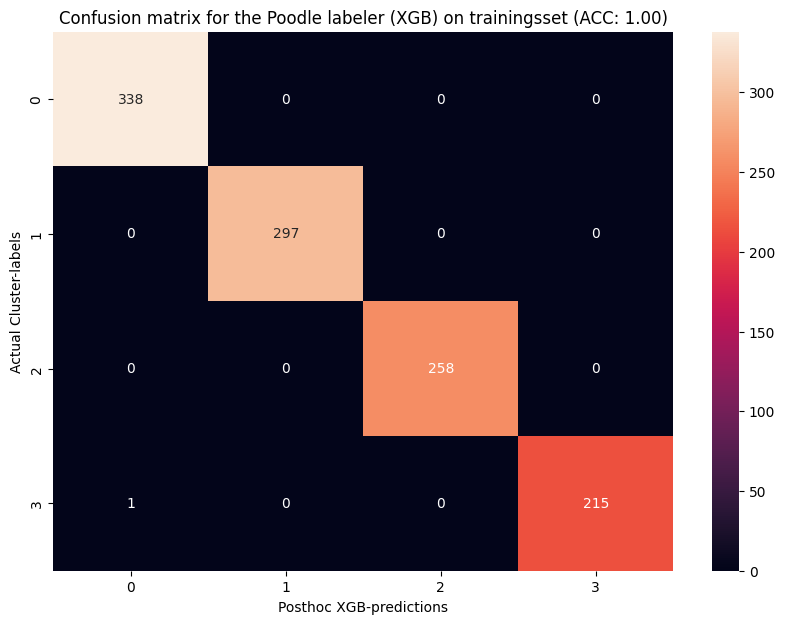

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

df_train, df_test = train_test_split(df_characteristics_original, test_size=0.2,  random_state=28072022) # stratify=df_characteristics['PhenoGraph_clusters'],

target = 'PhenoGraph_clusters'

cols_data = [x for x in list(df_train.columns) if x not in ['pseudoId', target]] #   'Sex', 'Age', 

X = df_train[cols_data].values
y = df_train[target]

# Apply 5 fold CV
kf = KFold(n_splits=5) # 
iteration = 0
y_pred = []
y_proba = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    X_train, X_test = pd.DataFrame(X).loc[train_index], pd.DataFrame(X).loc[test_index]
    #print(len(np.take(y,np.array(train_index)))) 
    y_train, y_test = np.take(y, np.array(train_index)),np.take(y, np.array(test_index))#.values  # .values

    # Z-score scaling
    scaler = StandardScaler().fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Model is an XGBClassifier
    n_trees = 50
    dmat_train = xgb.DMatrix(X_train, y_train)
    dmat_test = xgb.DMatrix(X_test, y_test)
    
    t0 = time.time()
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric='merror', num_class=len(y.unique()), n_trees=50)
    xgb_clf = xgb_clf.fit(X_train, y_train)

    t1 = time.time()
    iteration += 1
    
    # Create a confusion matrix over all data!
    y_proba.extend(xgb_clf.predict_proba(X_test))
    y_pred.extend(xgb_clf.predict(X_test))
    
fig = plt.figure()
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)


df_cm = pd.DataFrame(cm, index = list(range(len(y.unique()))),
                  columns = list(range(len(y.unique()))))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("Posthoc XGB-predictions")
plt.ylabel("Actual Cluster-labels")
plt.title('Confusion matrix for the Poodle labeler (XGB) on trainingsset (ACC: %.2f)' % (accuracy))

#### #4.3.3 Show performance on hold-out test set

Text(0.5, 1.0, 'Confusion matrix for the Poodle labeler (XGB) in independent test set (ACC: 1.00)')

<Figure size 640x480 with 0 Axes>

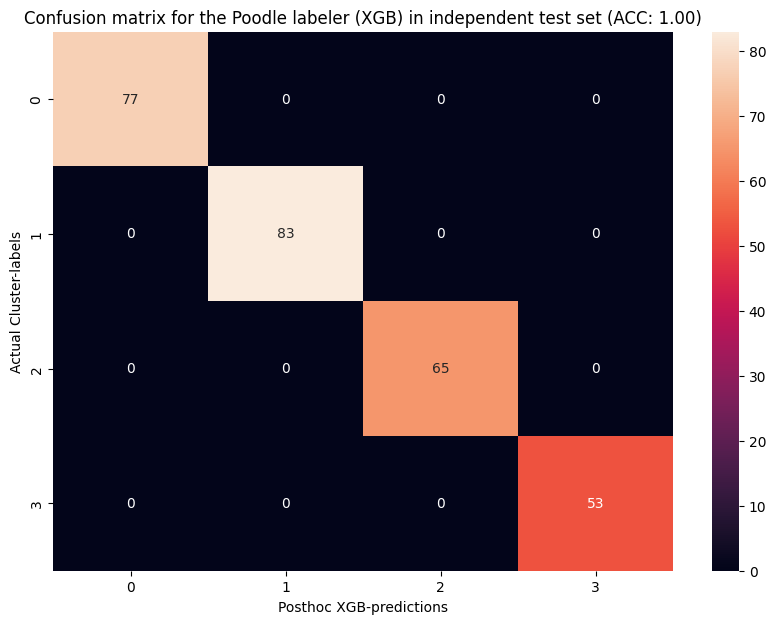

In [181]:
X_test_final = df_test[cols_data].values
y_test_final = df_test[target]

# Z-score scaling
#scaler = StandardScaler().fit(X_test)
X_test_final = scaler.transform(X_test_final)
y_pred_final = xgb_clf.predict(X_test_final)


fig = plt.figure()
cm = confusion_matrix(y_test_final, y_pred_final)
accuracy = accuracy_score(y_test_final, y_pred_final)


df_cm = pd.DataFrame(cm, index = list(range(len(y_test_final.unique()))),
                  columns = list(range(len(y_test_final.unique()))))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("Posthoc XGB-predictions")
plt.ylabel("Actual Cluster-labels")
plt.title('Confusion matrix for the Poodle labeler (XGB) in independent test set (ACC: %.2f)' % (accuracy))

#### #4.3.4 Compare to dummy classifier

Text(0.5, 1.0, 'Confusion matrix for the Dummy labeler (XGB) in independent test set (ACC: 0.45)')

<Figure size 640x480 with 0 Axes>

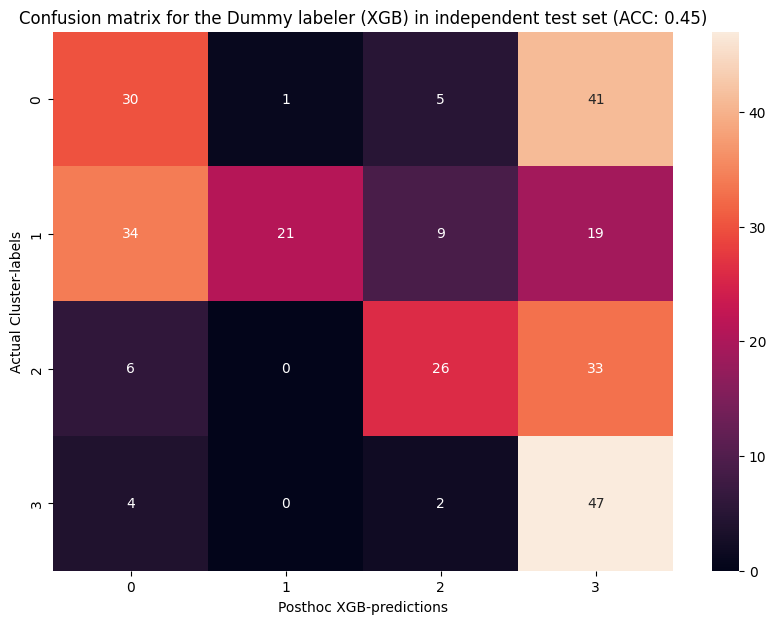

In [182]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score

def dummyLabeler(X):
    return np.argmax(X) # largest p

target = 'PhenoGraph_clusters'

X = df_test[[col for col in df_test.columns if 'weight_pval' in col]].copy()
y = df_test[target]

y_pred = []

for ix in range(len(X)): # loop through patients
    y_pred.append(dummyLabeler(X.iloc[ix]))

fig = plt.figure()
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

df_cm = pd.DataFrame(cm, index = list(range(len(y.unique()))),
                  columns = list(range(len(y.unique()))))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("Posthoc XGB-predictions")
plt.ylabel("Actual Cluster-labels")
plt.title('Confusion matrix for the Dummy labeler (XGB) in independent test set (ACC: %.2f)' % (accuracy))

#### #4.3.5 Train final model on all labeled data & Save model

In [ ]:
from sklearn.model_selection import KFold
import xgboost as xgb
import matplotlib.pyplot as plt

import time
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from pickle import dump

X_all = df_characteristics_original[cols_data]
y_all = df_characteristics_original[CLUSTER_LABEL]

scaler = StandardScaler().fit(X_all)

X_all = scaler.transform(X_all)

dmat_train = xgb.DMatrix(X_all, y_all)

t0 = time.time()
bst  = xgb.train({'objective': 'multi:softmax',  'eval_metric':'merror', 'num_class':len(y.unique())}, dmat_train, # 'num_class':len(y.unique())
                    n_trees, evals=[(dmat_train, "train")]) # "tree_method": "gpu_hist", 'gamma': 8, , (dmat_test, "test")
t1 = time.time()

# save poodle labeler
bst.save_model("../../../models/SyG_poodle/xgb_model.json")

# save scaler
dump(scaler, open('../../../models/SyG_poodle/scaler.pkl', 'wb'))


## #4.4 Use POODLE to cluster new instances

In [184]:
import sys
sys.path.append(r'../')
from poodle import utils as pup
import pandas as pd
from pickle import load

df_new = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterCharacteristics_Projection_SyG.csv', sep=',')

# Define input columns
target = 'PhenoGraph_clusters'
cols_data = [x for x in list(df_new.columns) if x not in ['pseudoId', target]]

# Classify patients
X_replication = df_new[cols_data]#.

# load the scaler
scaler = load(open('../../../models/SyG_poodle/scaler.pkl', 'rb'))
#X_replication = scaler.transform(X_replication)

df_new['PhenoGraph_clusters'] = pup.classifyPatient(X_replication, path="../../../models/SyG_poodle/")
df_new.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterAssignment_SyG.csv', index=False, sep=',')
df_new.head()

,pseudoId,PhenoGraph_clusters,weight_pval_0,weight_mean_0,weight_sd_0,cluster_mean_pat_0,cluster_sd_pat_0,weight_pval_1,weight_mean_1,weight_sd_1,...,weight_pval_2,weight_mean_2,weight_sd_2,cluster_mean_pat_2,cluster_sd_pat_2,weight_pval_3,weight_mean_3,weight_sd_3,cluster_mean_pat_3,cluster_sd_pat_3
0,id_0,3.0,0.000001,0.882775,0.077963,0.785578,0.093512,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.786863,0.079472,0.000001,0.767556,0.138172,0.644621,0.149679
1,id_1,1.0,0.000001,0.882775,0.077963,0.839908,0.074802,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.853962,0.063203,0.000001,0.767556,0.138172,0.726774,0.120305
2,id_2,2.0,0.000001,0.882775,0.077963,0.832792,0.060770,0.000001,0.945025,0.038027,...,0.923714,0.908031,0.061151,0.911525,0.043452,0.999994,0.767556,0.138172,0.791902,0.088829
3,id_3,2.0,0.000001,0.882775,0.077963,0.829031,0.072772,0.000001,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.885419,0.058157,0.000031,0.767556,0.138172,0.738026,0.118335
4,id_4,1.0,0.000001,0.882775,0.077963,0.842275,0.071638,0.987456,0.945025,0.038027,...,0.000001,0.908031,0.061151,0.857158,0.066632,0.000001,0.767556,0.138172,0.712364,0.116963


### #4.5 Spatial variance [Start here!]

In [1]:
import pandas as pd
df_new = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterAssignment_SyG.csv', sep=',')

# import metadata of development set
metadata_RA = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/MMAE_clustering_270.csv', index_col=0) #  pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/5_clustering/df_metadata.csv')
metadata_RA['Replication'] = 0

# Original clustering information (same samples as development set)
df_cluster_old = metadata_RA[['pseudoId', 'PhenoGraph_clusters']].copy()

Spatial variance in replication set: 	C1= 39; C2= 74; C3= 110; C4= 39
Spatial variance in original set: 	C1= 415; C2= 380; C3= 323; C4= 269


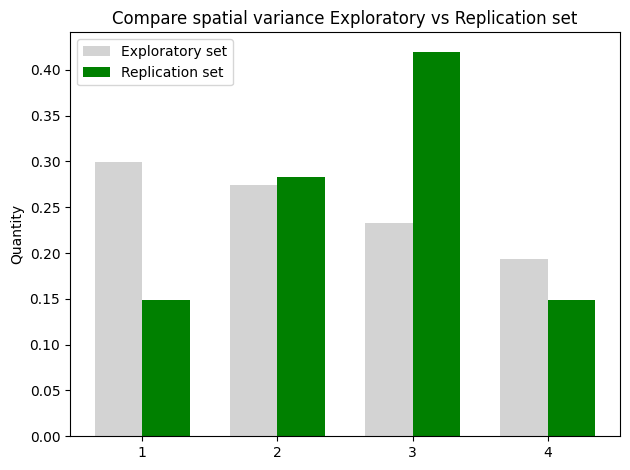

In [2]:
from collections import Counter
import sys
sys.path.append(r'/exports/reum/tdmaarseveen/Poodle')
from poodle import visualization as viz

c = Counter(df_new['PhenoGraph_clusters'])
l_new = [c[ix]/sum(c.values()) for ix in range(0,len(c))]
print('Spatial variance in replication set: \tC' + '; C'.join([str(ix+1) + '= ' + str(c[ix]) for ix in range(0,len(c))]))
c = Counter(df_cluster_old['PhenoGraph_clusters'])
l_old = [c[ix]/sum(c.values()) for ix in range(0,len(c))]
print('Spatial variance in original set: \tC' + '; C'.join([str(ix+1) + '= ' + str(c[ix]) for ix in range(0,len(c))]))

viz.plotSpatialVariation(l_new, l_old)

### #4.6 Plot gestalt for joint involvement in replicated clusters

In [3]:
import pandas as pd
import sys
sys.path.append(r'../../../src/1_emr_scripts')
import MannequinFunctions as func
import matplotlib.pyplot as plt

l_mannequin = [  'S_Wrist_R', 'S_Wrist_L', 'T_Wrist_R', 'T_Wrist_L', 
                'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
                'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
                'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
                'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
                'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
                'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
                'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
                'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
                'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
                'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
                'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
                'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5',
                'S_Knee_R', 'S_Knee_L', 'T_Knee_R', 'T_Knee_L',
                'S_Ankle_R', 'S_Ankle_L', 'T_Ankle_R','T_Ankle_L',
                'S_Elbow_R', 'S_Elbow_L', 'T_Elbow_R', 'T_Elbow_L',
                'S_Shoulder_R', 'S_Shoulder_L', 'T_Shoulder_R', 'T_Shoulder_L',
                'T_Hip_R', 'T_Hip_L'
                ]

# Import mannequin information
df_man = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_metadata.csv', sep='|') 
# Import all cluster variables
df_cluster = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterAssignment_SyG.csv', sep=',')
df_cluster['pseudoId'] = df_man['pseudoId'].copy()

df_man['PhenoGraph_clusters'] = df_cluster['PhenoGraph_clusters'].copy()

# 5 Explore histopathological features
### Show KSS scores per ACPA subgroup

/tmp/ipykernel_329671/339825322.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


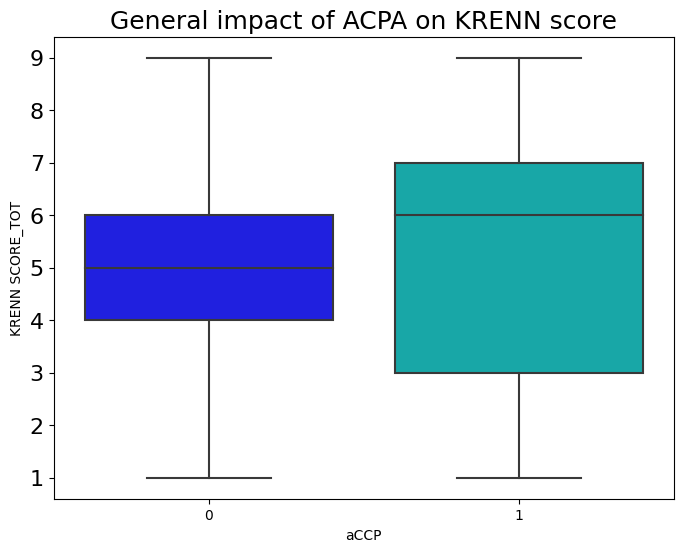

T-statistic: -0.7783389888855705
p-value: 0.4373273278103208


In [9]:
# Create a boxplot grouped by 'cluster'
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='aCCP', y='KRENN SCORE_TOT', data=df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])], palette=custom_colors) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('General impact of ACPA on KRENN score', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.show()

import pandas as pd
from scipy.stats import ttest_ind
sub_df = df_man[((df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])))].copy()


# ttest
group0 = sub_df[sub_df['aCCP'] == 0]['KRENN SCORE_TOT']
group1 = sub_df[sub_df['aCCP'] == 1]['KRENN SCORE_TOT']
t_stat, p_value = ttest_ind(group0, group1)

print("T-statistic:", t_stat)
print("p-value:", p_value)


/tmp/ipykernel_329671/3384235069.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


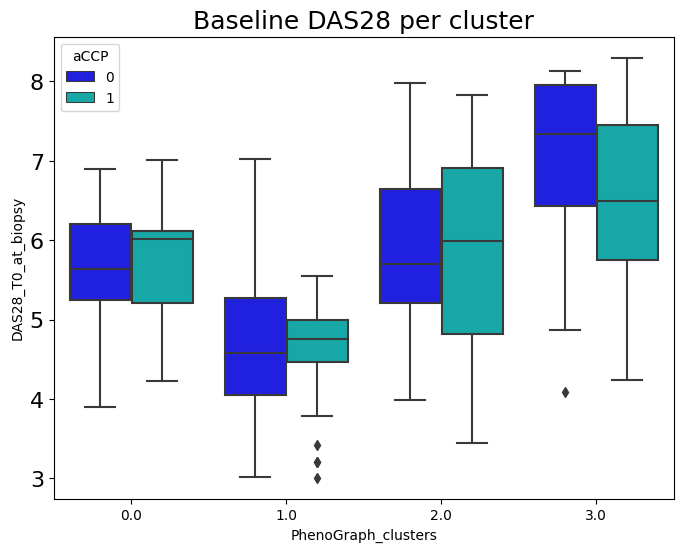

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
custom_colors = ["b","c","y","r"]


# Create a boxplot grouped by 'cluster'
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='PhenoGraph_clusters', y='DAS28_T0_at_biopsy', data=df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])], hue='aCCP', palette=custom_colors) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('Baseline DAS28 per cluster', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.show()

/tmp/ipykernel_329671/1386020167.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


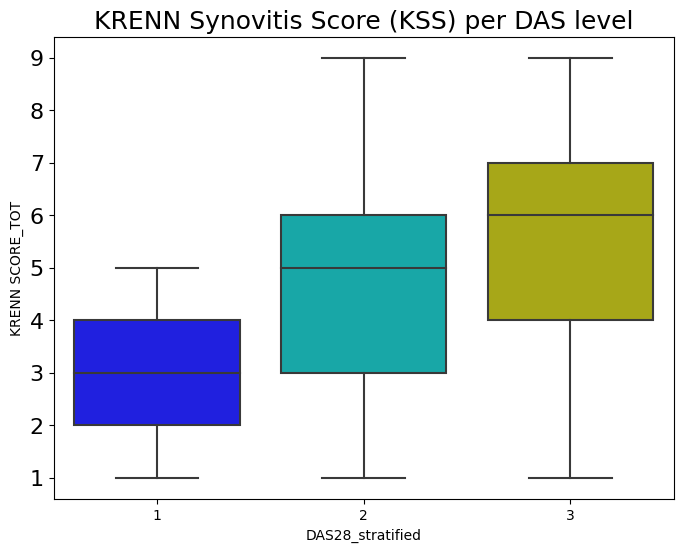


| Statistical differences between clusters (ANOVA for continuous) |
  Variable: DAS28_stratified (p-value: 0.371557259 );	F-Statistic: 1.090617265977351


In [20]:
from scipy.stats import f_oneway

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
custom_colors = ["b","c","y","r"]
#df = df[df['DAS28_stratified']==2]

# Create a boxplot grouped by 'cluster'
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='DAS28_stratified', y='KRENN SCORE_TOT', data=df_man[((df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])))], palette=custom_colors) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('KRENN Synovitis Score (KSS) per DAS level', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.show()

print('\n| Statistical differences between clusters (ANOVA for continuous) |')
l_con = ['DAS28_stratified']
col_cluster = 'KRENN SCORE_TOT'

df_sub_stat = df_man[((df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])))].copy()

for con in l_con : 
    # Split data by subgroup
    grouped_data = [df_sub_stat[((df_sub_stat[col_cluster] == subgroup) & (~df_sub_stat[con].isna()))][con] for subgroup in df_sub_stat[col_cluster].unique()]
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*grouped_data)
    
    print('  Variable:', con, "(p-value:", '%.9f' % p_value, ");\tF-Statistic:", f_stat)

/tmp/ipykernel_1546702/3590444536.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


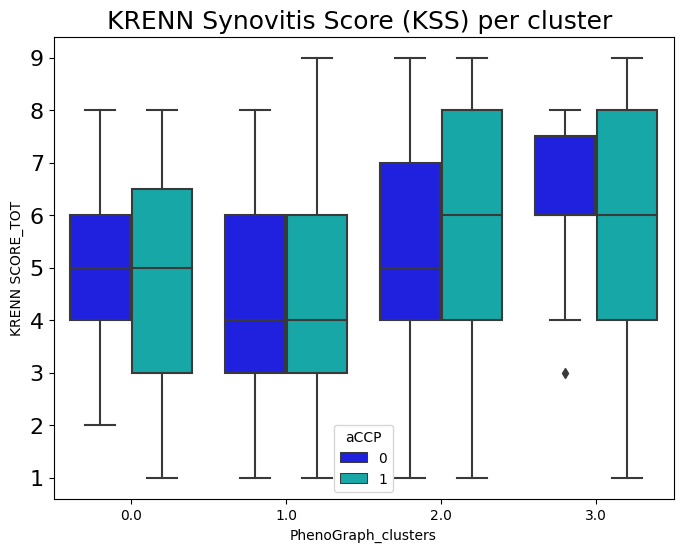

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
custom_colors = ["b","c","y","r"]


# Create a boxplot grouped by 'cluster'
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='PhenoGraph_clusters', y='KRENN SCORE_TOT', data=df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])], hue='aCCP', palette=custom_colors) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('KRENN Synovitis Score (KSS) per cluster ', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.show()

In [7]:
import pandas as pd
from scipy.stats import ttest_ind
sub_df = df_man[((df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])) & (df_man['PhenoGraph_clusters']==2))].copy()


# ttest
group0 = sub_df[sub_df['aCCP'] == 0]['KRENN SCORE_TOT']
group1 = sub_df[sub_df['aCCP'] == 1]['KRENN SCORE_TOT']
t_stat, p_value = ttest_ind(group0, group1)

print("T-statistic:", t_stat)
print("p-value:", p_value)


T-statistic: -0.7783389888855705
p-value: 0.4373273278103208


In [10]:
import scipy.stats as stats
from scipy.stats import kruskal
df = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df['PhenoGraph_clusters'] += 1
df= df.rename(columns={'KRENN SCORE_TOT': 'KRENN_SCORE_TOT', 'disease activity': 'disease_activity'})
df['disease_activity'] = df['disease_activity'].astype('category').cat.codes

# Split data into groups
groups = [df['KRENN_SCORE_TOT'][df['PhenoGraph_clusters'] == g] for g in df['PhenoGraph_clusters'].unique()]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H-statistic = {stat}, p-value = {p_value}")

Kruskal-Wallis Test: H-statistic = 13.424347686580163, p-value = 0.003803272882862489


### Create KRENN stacked bar chart

/tmp/ipykernel_3899563/2468301777.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


<Figure size 800x600 with 0 Axes>

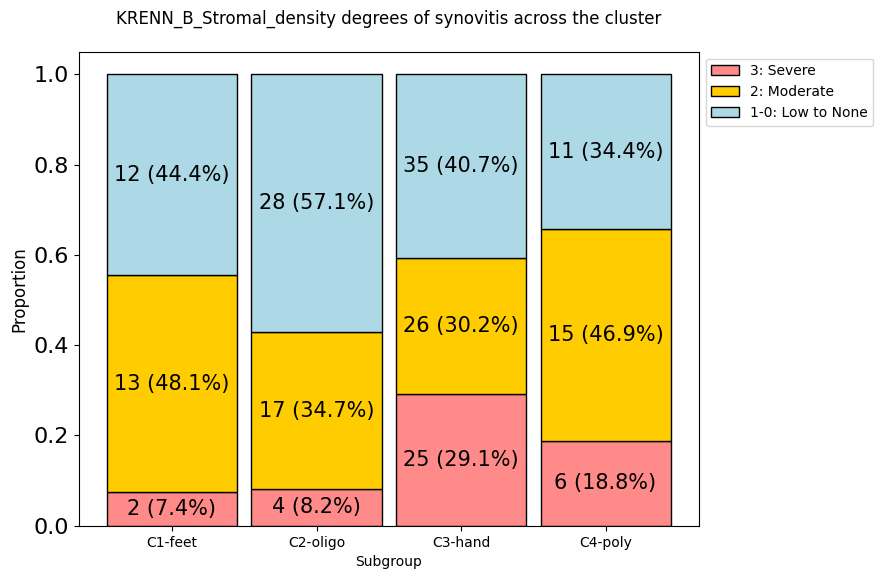

In [6]:

from matplotlib.colors import ListedColormap

COLUMN =  ['KRENN_A_Synovial_hyperplasia', 'KRENN_B_Stromal_density', 'KRENN_C_Inflammatory_infiltrate'][1]

df = df_man[((df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])))].copy()
df[COLUMN] = df[COLUMN].replace(0, 1) # Merge low & none? 
df['PhenoGraph_clusters'] += 1

df[COLUMN + '_1'] = df[COLUMN].apply(lambda x: 1 if x == 1 else 0)
df[COLUMN + '_2'] = df[COLUMN].apply(lambda x: 1 if x == 2 else 0)
df[COLUMN + '_3'] = df[COLUMN].apply(lambda x: 1 if x == 3 else 0)

# Define categoires
categories = [COLUMN + '_1',COLUMN + '_2',COLUMN + '_3'][::-1]

# Summarize by cluster
summary = df[[COLUMN + '_1',COLUMN + '_2',COLUMN + '_3',   'PhenoGraph_clusters']].groupby('PhenoGraph_clusters').sum().reset_index()

# Normalize the values (row-wise normalization)
summary_normalized = summary.copy()
summary_normalized[categories] = summary[categories].div(summary[categories].sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))

# Similar colors for 'Very Low' and 'Low', and different colors for 'Moderate' and 'Severe'
colors = ['#FF8A8A', '#ffcc00', '#add8e6']  # Light blue for low, yellow for moderate, red for severe

# Define the chronological order for the Date column
order = [1, 2, 3,4]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

l_counts = list(summary[categories].sum(axis=1)) 
clusters = summary['PhenoGraph_clusters']#.unique()
bottom = None
# Plot each category and annotate
for i, category in enumerate(categories):
    bars = ax.bar(clusters, summary_normalized[category], label=category, bottom=bottom, width=0.9, linewidth=1, color=colors[i], edgecolor='black')
    # Calculate prevalence and annotate
    for ix, bar in enumerate(bars):
        height = bar.get_height()
        # Prevalence as a percentage
        prevalence = (height / summary[category].sum()) * 100
        count = int(round(height * l_counts[ix]))  # Number of samples
        if height > 0:  # Annotate only if there's a positive height
            x = bar.get_x() + bar.get_width() / 2
            #print(x)
            y = bar.get_y() + height / 2
            ax.text(x, y, '%s (%.1f' % (int(round(height * l_counts[ix])), height * 100) + '%)', fontsize=15, ha='center', va='center', color='black')
            
    bottom = summary_normalized[categories[:i+1]].sum(axis=1) if bottom is None else bottom + summary_normalized[category]

# Customize plot
plt.title('%s degrees of synovitis across the cluster' % COLUMN, pad=20)
plt.subplots_adjust(top=0.9) 
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Subgroup")
ax.legend(title='Categories')
plt.legend([ '3: Severe', '2: Moderate', '1-0: Low to None', '0: None'], loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the position as needed

#plt.xticks(rotation=45)
plt.xticks(ticks=[ax.containers[0][i].get_x() + ax.containers[0][i].get_width()/2 for i in range(4) ] , labels=['C1-feet', 'C2-oligo', 'C3-hand', 'C4-poly'])
# Get the current x-tick labels and increase their font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


#plt.tight_layout()
plt.show()


In [ ]:
# Convert the categorical 'cluster' variable to dummy/indicator variables
df = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df = pd.get_dummies(df, columns=['PhenoGraph_clusters'], drop_first=True)
df

### Statistical analysis: Krenn components

In [13]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd
import numpy as np


COLUMN =  ['KRENN_A_Synovial_hyperplasia', 'KRENN_B_Stromal_density', 'KRENN_C_Inflammatory_infiltrate'][1] # 'KRENN_A_Synovial_hyperplasia' #  'KRENN_A_Synovial_hyperplasia', 'KRENN_B_Stromal_density', 'KRENN_C_Inflammatory_infiltrate'
print(COLUMN)

df = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df['PhenoGraph_clusters'] += 1
df[COLUMN] = df[COLUMN].replace(0, 1)
# Fit the ordered probit model - as it is less prone as it doesnt presume equal spacing.
model =OrderedModel.from_formula('%s ~ PhenoGraph_clusters' % (COLUMN), distr='logit', data=df)



result = model.fit(maxiter=100)

# Print the results summary
print(result.summary())

KRENN_B_Stromal_density
Optimization terminated successfully.
         Current function value: 1.034015
         Iterations: 77
         Function evaluations: 135
                                OrderedModel Results                               
Dep. Variable:     KRENN_B_Stromal_density   Log-Likelihood:                -200.60
Model:                        OrderedModel   AIC:                             407.2
Method:                 Maximum Likelihood   BIC:                             417.0
Date:                     Fri, 31 Jan 2025                                         
Time:                             17:23:33                                         
No. Observations:                      194                                         
Df Residuals:                          191                                         
Df Model:                                1                                         
                          coef    std err          z      P>|z|      [0.025      

### look for inter cluster differences w/ Wald test

In [14]:
import itertools

# After fitting models for each cluster, you can compare coefficients
wald_tests = {}
history_cluster = []

for cluster1, cluster2 in itertools.product([1,2,3,4], [1,2,3,4]):
    lclus= [cluster1, cluster2]
    lclus.sort() 
    if cluster1 == cluster2:
        continue
    elif lclus in history_cluster:
        continue
    else :
        print(lclus)
        history_cluster.append(lclus)
    print(f"Cluster: {cluster1}, Cluster: {cluster2}")
    cluster_data = df[df['PhenoGraph_clusters'].isin([cluster1, cluster2])].reset_index(drop=True).copy()
    y_cluster = cluster_data['PhenoGraph_clusters']
    X_cluster = cluster_data[COLUMN]

    model_cluster = OrderedModel.from_formula('%s ~ PhenoGraph_clusters' % COLUMN,  distr='logit', data=cluster_data)
    result_cluster = model_cluster.fit(disp=0)
    
    #print(result_cluster.summary())

    # Perform a Wald test to compare if the coefficient of 'feature1' differs across clusters
    wald_test_feature1 = result_cluster.wald_test([1, 0, 0], scalar=False)  # Assuming 'feature1' is at index 1
    conf_int = result_cluster.conf_int()
    coef = result_cluster.params
    #print(coef)
    wald_tests['%s|%s' % (cluster1, cluster2) ] = [wald_test_feature1, '%.2f' % coef[0], '%.2f - %.2f' % (conf_int[0][0], conf_int[0][1]) ]
    

# Print the Wald test results for each cluster
# Print the Wald test results for each cluster
df_pairwise = pd.DataFrame(columns=['Comparison', 'Statistic', 'Pval', 'coef', 'Conf'])
for cluster, wald_test in wald_tests.items():
    df_pairwise.loc[len(df_pairwise)] = [cluster, wald_test[0].statistic[0][0], wald_test[0].pvalue, wald_test[1], wald_test[2]]
    
df_pairwise

[1, 2]
Cluster: 1, Cluster: 2
[1, 3]
Cluster: 1, Cluster: 3
[1, 4]
Cluster: 1, Cluster: 4
[2, 3]
Cluster: 2, Cluster: 3
[2, 4]
Cluster: 2, Cluster: 4
[3, 4]
Cluster: 3, Cluster: 4


,Comparison,Statistic,Pval,coef,Conf
0,1|2,0.834518,0.36096944875315495,-0.42,-1.33 - -2.13
1,1|3,1.566157,0.21076601727753505,0.25,-0.14 - -0.76
2,1|4,1.279183,0.25805097045319825,0.19,-0.14 - -0.95
3,2|3,6.128511,0.013301887108114804,0.85,0.18 - 0.29
4,2|4,4.498193,0.033930691503759804,0.47,0.04 - -0.06
5,3|4,0.020147,0.887128653465304,-0.05,-0.78 - -3.06


### What if we adjust for DAS categories? 

Does the cluster effect still persist?

In [51]:

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd
import numpy as np
def stratified_das28(das):
    if das >= 5.1:
        return 3
    elif das >= 3.2:
        return 2
    elif das >= 2.6: 
        return 1
    elif das < 2.6: 
        return 0
    
df_man['DAS28_stratified'] = df_man['DAS28_T0_at_biopsy'].apply(lambda x : stratified_das28(x) )

COLUMN =  ['KRENN_A_Synovial_hyperplasia', 'KRENN_B_Stromal_density', 'KRENN_C_Inflammatory_infiltrate'][1] 

df = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df['PhenoGraph_clusters'] += 1
df= df.rename(columns={'KRENN SCORE_TOT': 'KRENN_SCORE_TOT', 'disease activity': 'disease_activity'})
df['disease_activity'] = df['disease_activity'].astype('category').cat.codes
df[COLUMN] = df[COLUMN].replace(0, 1)

# Fit the ordered probit model - as it is less prone as it doesnt presume equal spacing.
model =OrderedModel.from_formula('%s ~ PhenoGraph_clusters + DAS28_stratified' % (COLUMN), distr='probit', data=df)

result = model.fit()

# Print the results summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.026499
         Iterations: 210
         Function evaluations: 352
                                OrderedModel Results                               
Dep. Variable:     KRENN_B_Stromal_density   Log-Likelihood:                -199.14
Model:                        OrderedModel   AIC:                             406.3
Method:                 Maximum Likelihood   BIC:                             419.4
Date:                     Mon, 06 Jan 2025                                         
Time:                             17:21:43                                         
No. Observations:                      194                                         
Df Residuals:                          190                                         
Df Model:                                2                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------

### Statistical analysis: Krenn components

In [20]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd
import numpy as np


print(COLUMN)

df = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df['PhenoGraph_clusters'] += 1
df['KRENN_SCORE_TOT'] = df['KRENN SCORE_TOT'].copy()
COLUMN= 'KRENN_SCORE_TOT'
#df[COLUMN] = df[COLUMN].replace(0, 1)
# Fit the ordered probit model - as it is less prone as it doesnt presume equal spacing.
model =OrderedModel.from_formula('%s ~ PhenoGraph_clusters' % (COLUMN), distr='logit', data=df)



result = model.fit(maxiter=100)

# Print the results summary
print(result.summary())

KRENN_B_Stromal_density
                             OrderedModel Results                             
Dep. Variable:        KRENN_SCORE_TOT   Log-Likelihood:                -404.67
Model:                   OrderedModel   AIC:                             827.3
Method:            Maximum Likelihood   BIC:                             856.8
Date:                Tue, 17 Dec 2024                                         
Time:                        09:36:13                                         
No. Observations:                 194                                         
Df Residuals:                     185                                         
Df Model:                           1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
PhenoGraph_clusters     0.0285      0.134      0.213      0.831      -0.234       0.291
1

/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
import itertools

# After fitting models for each cluster, you can compare coefficients
wald_tests = {}
history_cluster = []

for cluster1, cluster2 in itertools.product([1,2,3,4], [1,2,3,4]):
    lclus= [cluster1, cluster2]
    lclus.sort() 
    if cluster1 == cluster2:
        continue
    elif lclus in history_cluster:
        continue
    else :
        print(lclus)
        history_cluster.append(lclus)
    print(f"Cluster: {cluster1}, Cluster: {cluster2}")
    cluster_data = df[df['PhenoGraph_clusters'].isin([cluster1, cluster2])].reset_index(drop=True).copy()
    y_cluster = cluster_data['PhenoGraph_clusters']
    X_cluster = cluster_data[COLUMN]

    model_cluster = OrderedModel.from_formula('%s ~ PhenoGraph_clusters' % COLUMN,  distr='logit', data=cluster_data)
    result_cluster = model_cluster.fit(disp=0)
    
    #print(result_cluster.summary())

    # Perform a Wald test to compare if the coefficient of 'feature1' differs across clusters
    wald_test_feature1 = result_cluster.wald_test([1,0,0,0,0,0,0,0,0], scalar=False)  # Assuming 'feature1' is at index 1
    conf_int = result_cluster.conf_int()
    coef = result_cluster.params
    #print(coef)
    wald_tests['%s|%s' % (cluster1, cluster2) ] = [wald_test_feature1, '%.2f' % coef[0], '%.2f - %.2f' % (conf_int[0][0], conf_int[0][1]) ]
    

# Print the Wald test results for each cluster
# Print the Wald test results for each cluster
df_pairwise = pd.DataFrame(columns=['Comparison', 'Statistic', 'Pval', 'coef', 'Conf'])
for cluster, wald_test in wald_tests.items():
    df_pairwise.loc[len(df_pairwise)] = [cluster, wald_test[0].statistic[0][0], wald_test[0].pvalue, wald_test[1], wald_test[2]]
    
df_pairwise

[1, 2]
Cluster: 1, Cluster: 2
[1, 3]
Cluster: 1, Cluster: 3
[1, 4]
Cluster: 1, Cluster: 4
[2, 3]
Cluster: 2, Cluster: 3
[2, 4]
Cluster: 2, Cluster: 4
[3, 4]
Cluster: 3, Cluster: 4


/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

,Comparison,Statistic,Pval,coef,Conf
0,1|2,1.010582,0.3147635447960452,-0.42,-1.24 - -5.69
1,1|3,1.240200,0.2654324810869563,0.21,-0.16 - -3.38
2,1|4,2.953315,0.08570160846524126,0.27,-0.04 - -4.68
3,2|3,7.179004,0.007376165482973927,0.85,0.23 - -2.31
4,2|4,11.356933,0.0007516685373165608,0.73,0.30 - -2.99
5,3|4,1.419407,0.2335009925852093,0.43,-0.28 - -3.77


### mean KSS scores per biopsy site

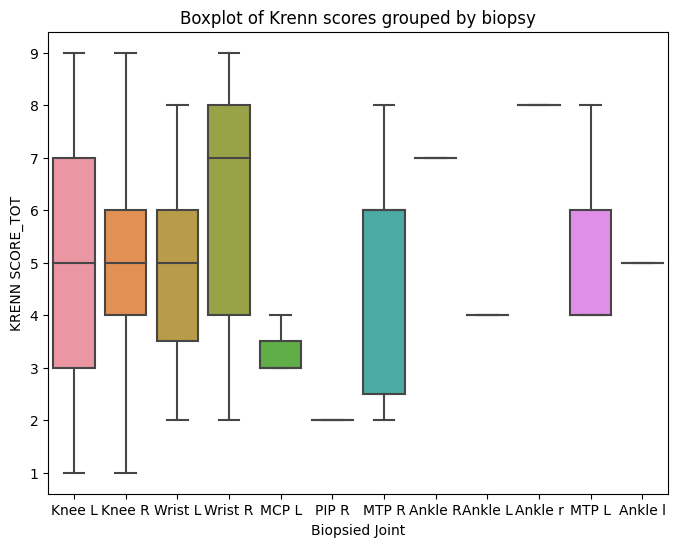

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot grouped by 'biopsy'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Biopsied Joint', y='KRENN SCORE_TOT', data=df_man) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('Boxplot of Krenn scores grouped by biopsy')
plt.show()

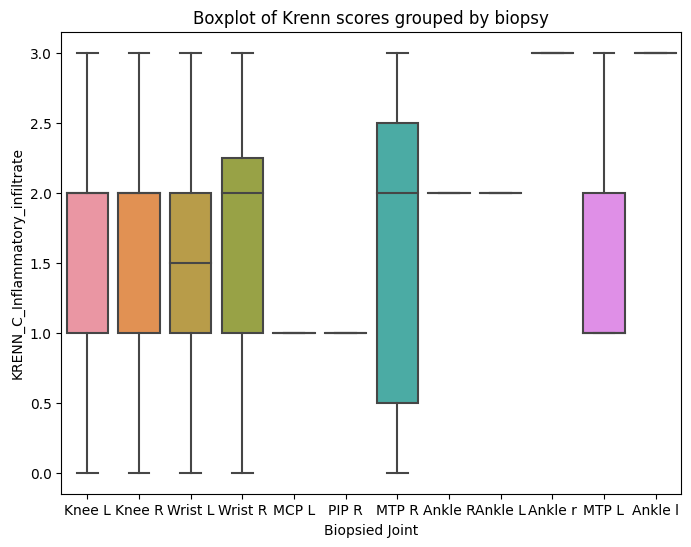

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot grouped by 'biopsy'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Biopsied Joint', y='KRENN_C_Inflammatory_infiltrate', data=df_man) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('Boxplot of Krenn scores grouped by biopsy')
plt.show()

## Mean DAS per biopsy site

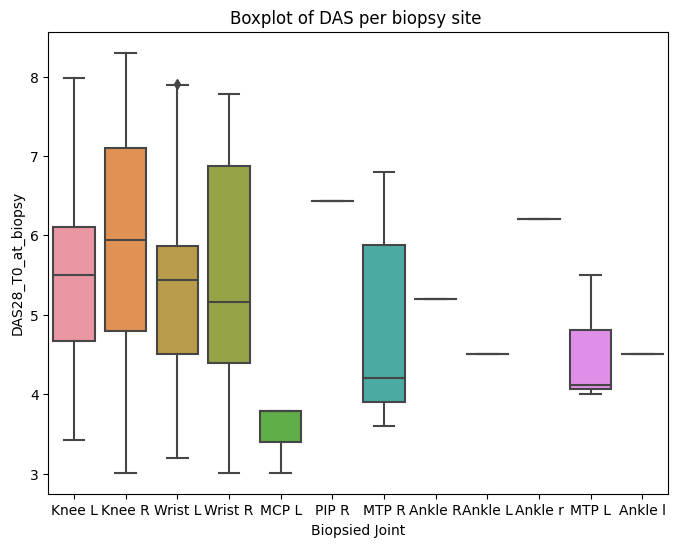

In [39]:
# Create a boxplot grouped by 'biopsy'

# Create a boxplot grouped by 'biopsy'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Biopsied Joint', y='DAS28_T0_at_biopsy', data=df_man) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('Boxplot of DAS per biopsy site ')
plt.show()

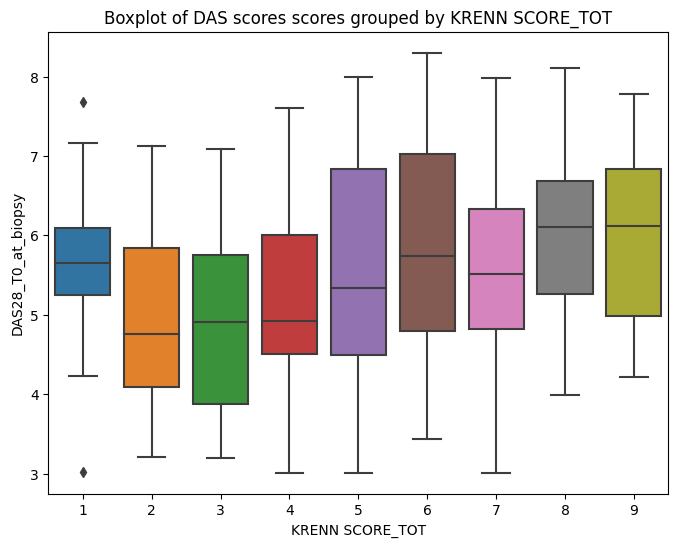

In [30]:
# Create a boxplot grouped by 'biopsy'
plt.figure(figsize=(8, 6))
sns.boxplot(x='KRENN SCORE_TOT', y='DAS28_T0_at_biopsy', data=df_man) # [df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])
plt.title('Boxplot of DAS scores scores grouped by KRENN SCORE_TOT')
plt.show()

#### [Optional] plot gestalt for  original clusters instead of replicated clusters

#### #3.5.2. Plot gestalt to highlight swelling

In [192]:
import importlib as imp
import MannequinFunctions as func
imp.reload(func)

<module 'MannequinFunctions' from '../../../src/1_emr_scripts/MannequinFunctions.py'>

(-0.5, 1452.5, 1799.5, -0.5)

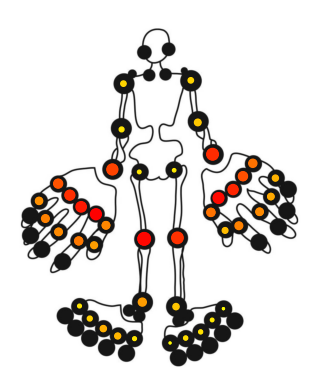

In [8]:
CLUSTER =2
CATEGORY = 'S_' # 'Zwelling'


l_pat = set(df_cluster[df_cluster['PhenoGraph_clusters']==CLUSTER]['pseudoId'])
df_sub = df_man[df_man['pseudoId'].isin(l_pat)].copy()

#create scatterplot (toDo: for both big & small joints)
#l_col = [col for col in df_sub.columns if col not in ['pseudoId', 'patnr','FirstConsult', 'PATNR']]
l_col = [col for col in l_mannequin if CATEGORY in col]
l_col = l_mannequin
df_plot = pd.DataFrame(df_sub[l_col].mean().T)
df_plot= df_plot.reset_index()
df_plot.columns = ['feature', 'value']
df_plot['x'], df_plot['y'], df_plot['s'] = zip(*df_plot['feature'].apply(lambda x : func.get_mannequin_coord_lowRes(x)))
df_plot['s'] = df_plot['s'] * df_plot['value']

# Visualize gestalt
im = plt.imread('../../../figures/2_processing/Mannequin_large_old.jpg')
implot = plt.imshow(im)
plt.scatter(df_plot.x, df_plot.y, s=df_plot.s, c=df_plot.value, cmap='autumn_r')
fig = plt.gcf()
fig.set_dpi(100)
#plt.text(450, 1, r'Cluster %s' % str(CLUSTER+1), fontsize=15)
plt.axis('off')

#### 3.5.3 Plot gestalt to highlight all joint involvement

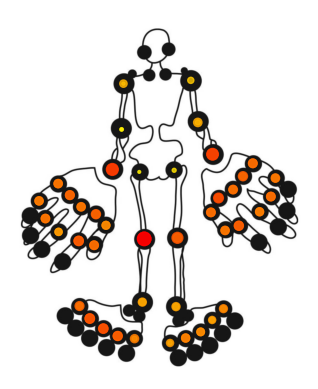

In [210]:
CLUSTER =3
l_pat = set(df_cluster[df_cluster['PhenoGraph_clusters']==CLUSTER]['pseudoId'])
df_man['index'] = df_cluster['pseudoId'].copy()

#df_knee = df_man[df_man['Biopsied Joint'].isin(['Knee L', 'Knee R'])].reset_index(drop=True).copy()

df_sjc = df_man[df_man['pseudoId'].isin(l_pat)].copy()
df_tjc = df_sjc.copy()
l_swollen = [col for col in l_mannequin if 'S_' in col]
l_swollen.append('pseudoId')

l_tender = [col for col in l_mannequin if 'T_' in col]
l_tender.append('pseudoId')

df_sjc = df_sjc[l_swollen]
df_tjc = df_tjc[l_tender]

df_total = pd.concat([df_sjc, df_tjc]).groupby('pseudoId', as_index=False).mean()

#create scatterplot (toDo: for both big & small joints)
l_col = [col for col in df_total.columns if col not in ['pseudoId', 'patnr','FirstConsult', 'index']]
df_plot = pd.DataFrame(df_total[l_col].mean().T)
df_plot= df_plot.reset_index()
df_plot.columns = ['feature', 'value']
df_plot['x'], df_plot['y'], df_plot['s'] = zip(*df_plot['feature'].apply(lambda x : func.get_mannequin_coord_lowRes(x)))## func.
df_plot['s'] = df_plot['s'] * df_plot['value']

# Visualize gestalt
im = plt.imread('../../../figures/2_processing/Mannequin_large_old.jpg')
implot = plt.imshow(im)
plt.scatter(df_plot.x, df_plot.y, s=df_plot.s, c=df_plot.value, alpha=0.8, cmap='autumn_r')
fig = plt.gcf()
plt.axis('off')
#plt.text(450, 1, r'Cluster %s' % str(CLUSTER+1), fontsize=15)
fig.set_dpi(100)

### #3.6 Visualize Learned embedding

In [15]:
import sys
sys.path.append(r'../')
sys.path.append(r'/exports/reum/tdmaarseveen/Poodle')
from poodle import utils as pup
import pandas as pd
import numpy as np

df_z = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding_projections.csv', sep=',')
l_embedding = [col for col in df_z.columns]

# Variables from replication set
df_projection = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterAssignment_SyG.csv', sep=',')


# Get Original clustering metadata (same samples as development set)
# import metadata of SyG replication set
metadata_rep = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_metadata.csv', sep='|')
metadata_rep['Replication'] = 1
# add cluster info for projected patietns
metadata_rep['PhenoGraph_clusters'] = df_projection['PhenoGraph_clusters'].copy() # len(metadata['PhenoGraph_clusters'].unique())+1


# import metadata of development set
metadata_RA = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/MMAE_clustering_270.csv', index_col=0) #  pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/5_clustering/df_metadata.csv')
metadata_RA['Replication'] = 0
l_no_man = [x for x in metadata_RA.columns if ('Pijn' not in x and 'Zwelling' not in x)]

# Exclude old mannequin variables
metadata_RA = metadata_RA[l_no_man].copy()

# Add new mannequin variables
df_new_mann = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/df_categoric.csv', sep=',')
l_new_mann = [x for x in df_new_mann.columns if ('S_' in x or 'T_' in x or 'pseudo' in x)]
metadata_RA = metadata_RA.merge(df_new_mann[l_new_mann], on='pseudoId', how='left') 

# Combine both metadatas
metadata = metadata_RA.append(metadata_rep, ignore_index = True)

# Add projected patients to original set
l_latent = [col for col in l_embedding if col not in ['pseudoId']]

print('BEFORE: total samples for tsne: ', len(metadata_RA))
metadata_total, z_total = pup.add_projected_patients(metadata_RA, pd.DataFrame(z_filtered, columns=l_latent), metadata_rep, z_patient[l_latent]) # ix = 
print('After: total samples for tsne: ', len(metadata_total))

BEFORE: total samples for tsne:  1387
After: total samples for tsne:  1649


/tmp/ipykernel_1858334/1380459496.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata_RA.append(metadata_rep, ignore_index = True)


In [195]:
metadata.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/SyG_Complete_META.csv', sep=';', index=None)

#### #3.6.1 Fit parametric umap

In [ ]:
from umap.parametric_umap import ParametricUMAP
import importlib as imp
import tensorflow as tf

SEED = 20241119

from umap.parametric_umap import ParametricUMAP
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import importlib as imp
import sys
sys.path.append(r'../')
sys.path.append(r'/exports/reum/tdmaarseveen/Poodle')
from poodle import utils as pup


z_filtered = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding.csv', sep=',')
z_filtered = z_filtered[z_filtered.columns[1:]]
   
#df_z[l_embedding].to_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding.csv', index=False, sep=',')


# Define the encoder model
def create_encoder(input_dim, latent_dim):
    input_layer = Input(shape=(input_dim,))
    #x = Dense(64, activation='sigmoid')(input_layer) # sigmoid
    x = Dense(32, activation='sigmoid')(input_layer)
    x = Dense(16, activation='sigmoid')(x)
    latent_space = Dense(latent_dim)(x)  # No activation in the output layer

    return Model(input_layer, latent_space, name='encoder')
 
# Parameters
input_dim = 8
latent_dim = 2  # Target dimension for UMAP

encoder = create_encoder(input_dim, latent_dim)
encoder.summary()

keras_fit_kwargs = {"callbacks": [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=10**-3,
        patience=10,
        verbose=1,
    )
]}

SEED = 20240513

embedder = ParametricUMAP(random_state=SEED, keras_fit_kwargs=keras_fit_kwargs, encoder=encoder, n_training_epochs=20) #
embedding = embedder.fit_transform(z_filtered)
pup.plot_tsne(embedding, group_id=metadata_RA['PhenoGraph_clusters'], path='../../../figures/7_replication/umap_original_SyG.png')

# save parametric UMAP
embedder.save('../models/umap/umap_mapping_SyG')

#### #3.6.2 Project both original and replication samples


In [221]:
import numpy as np

def plot_tsne(fit, group_id, foreground=np.nan, path=None, palette=np.nan):
    """
    Description: 
        Visualize the t-sne 2 dimensional embedding, and color by group_id.
        User can also provide an additional column (w/ foreground), which serves as
        mask to differentiate between foreground and background
        
    Input: 
        fit = tsne fit
        group_id = column (pandas Series) indicating the group of a sample
        foreground = seperate masking column (pandas Series; range:0-1) that
        indicates which samples should be placed at the foreground, and which 
        should be put at the background. Every value part of the background
        will be drawn in light grey (e.g. you may want to put original
        embedding to the background if you want to visualize novel patients)
        
            Visualize all those from original dataset (e.g. replication = 0) with gray
        palette = list of hex-encoded colors
    """
    plt.figure(figsize=(6, 5))
    
    if np.isnan(palette):
        c_cat = ['#4F6CCF', '#2db9cc', '#fcba03', '#FA4D4D',  "#7a4da4", "#C88D94", "#FF0000FF", "#CCFF00FF", "#49BA2B", "#0066FFFF", "#CC00FFFF", '#FF9595']
        c_binary = ['#ff0000', '#1e90ff']
    else :
        c_cat = palette
        c_binary = palette
    
    if len(group_id.unique()) <= 2:
        colors = [c_binary[i] for i in range(len(group_id.unique()))]  # if binary = choose 2 complementary colors
    else :
        colors = [c_cat[i] for i in range(len(group_id.unique()))] 
    if type(foreground)!=float:
        group_id = pd.Series([-1 if foreground[i] == 0 else group_id[i] for i in range(len(foreground)) ])
        plt.scatter(fit[group_id == -1, 0], fit[group_id == -1, 1], c='#d4d4d4', label='original')
    
    target_ids = range(len(group_id))
    
    for i, c, label in zip(target_ids, colors, [j for j in range(len(group_id.unique()))]): # 
        if len(fit[group_id == i, 0])> 0:
            plt.scatter(fit[group_id == i, 0], fit[group_id == i, 1], c=c, label=label)
    plt.legend()
    if path != None:
        plt.savefig(path)
        plt.close()
    else :
        plt.show()
    return  


# Save embedding + projection
z_total = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding_projections.csv', sep=',')
z_total = z_total[z_total.columns[1:]]
metadata_total = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/SyG_Complete_META.csv', sep=';')

# Project replication data onto tSNE
fit2 = embedder.transform(z_total.values)

# Plot Umap as 2d image

palette= ['lightgrey', 'g']
plot_tsne(fit2, group_id=metadata_total['PhenoGraph_clusters'], foreground=metadata_total['Replication'], path='../../../figures/7_replication/umap_replication_projected_SyG-clust.png', palette=palette)




In [218]:
palette = np.nan
plot_tsne(fit2, group_id=metadata_total['PhenoGraph_clusters'], foreground=metadata_total['Replication'], path='../../../figures/7_replication/umap_replication_projected_SyG-clust.png', palette=palette)


0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Name: Biopsied Joint, Length: 1649, dtype: bool

Product space (2D representation)            |  Newly projected patients on product space
:-------------------------:|:-------------------------:
![tsne_original]('../../../figures/7_replication/umap_original_SyG.png) |  ![tsne_replicate]('../../../figures/7_replication/umap_replication_projected_SyG.png)

### tSNE original space

In [199]:
# define categorical features
l_categorical = ['RF', 'aCCP', 'Sex'] # 'pseudoId', 
l_mannequin = [  'S_Wrist_R', 'S_Wrist_L', 'T_Wrist_R', 'T_Wrist_L', 
                'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
                'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
                'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
                'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
                'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
                'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
                'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
                'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
                'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
                'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
                'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
                'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5',
                'S_Knee_R', 'S_Knee_L', 'T_Knee_R', 'T_Knee_L',
                'S_Ankle_R', 'S_Ankle_L', 'T_Ankle_R','T_Ankle_L',
                'S_Elbow_R', 'S_Elbow_L', 'T_Elbow_R', 'T_Elbow_L',
                'S_Shoulder_R', 'S_Shoulder_L', 'T_Shoulder_R', 'T_Shoulder_L',
                'T_Hip_R', 'T_Hip_L'
                ]


l_categorical.extend(l_mannequin)

z_orig = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/results/embedding/SyG_embedding.csv', sep=',')[df_z.columns[1:]]

# Create interactive TSNE with metadata
X_orig = TSNE(n_components=2, random_state=7062021).fit_transform(z_orig)

# Create interactive bokeh plot for more information
pup.plot_interactive_tsne(X_orig, metadata_RA, list(metadata_RA.columns), l_binary=l_categorical, patient_id='pseudoId', cluster_id='PhenoGraph_clusters', path='/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Set_MMAE_orig.html')




/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/exports/reum/tdmaarseveen/envs/mmae/envs/ae_training/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



UMAP figure saved under location: /exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Set_MMAE_orig.html


### tSNE new space

In [18]:
# Create interactive TSNE with metadata
#X_total = TSNE(n_components=2, random_state=7062021).fit_transform(z_total)

# Create interactive bokeh plot for more information
#pup.plot_interactive_tsne(fit2, metadata, list(metadata.columns), l_binary=list(df_categoric_replication.columns), patient_id='pseudoId', cluster_id='PhenoGraph_clusters', path='/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Set_MMAE_clust.html')


pup.plot_tsne(fit2, group_id=metadata['PhenoGraph_clusters'], foreground= metadata['Replication'],path='../../../figures/offshoots/syngem/umap_replication_projected.png')



### Create baseline table

In [34]:
import pandas as pd
import numpy as np

def calculate_DAS28(tjc, sjc, esr):
    """
    Calculate DAS28 with 3 variables : TJC, SJC and ESR (BSE)
    """
    #print(esr)
    if esr != 0:
        das28 = (0.56 * np.sqrt(tjc) + 0.28 * np.sqrt(sjc) + 0.70 * np.log(esr)) * 1.08 + 0.16
    else :
        print(esr, tjc, sjc)
        print(eql)
    #print(das28)
    return das28

def calculate_DAS44(tjc, sjc, esr):
    """
    Calculate DAS44 with 3 variables : RAI, SJC and ESR (BSE)
    """

    das44= (0.53938 * np.sqrt(tjc) + 0.0650 * (sjc) + 0.330 * np.log(esr)) + 0.224 
    return das44

df_cluster = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/ClusterAssignment_SyG.csv', sep=',')

df_categoric_replication = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_categoric_ohe.csv', sep='|')
df_numeric_replication = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/offshoots/ERC_SyG/SyG_Lab_wide_scaled.csv', sep='|')#[l_num]


### Calculate tender & swollen joint count

In [35]:
import pandas as pd

l_categorical = ['RF', 'aCCP', 'Sex'] # 'pseudoId', 
l_mannequin = [  'S_Wrist_R', 'S_Wrist_L', 'T_Wrist_R', 'T_Wrist_L', 
                'S_MCP_R1', 'S_MCP_R2', 'S_MCP_R3', 'S_MCP_R4', 'S_MCP_R5',
                'S_MCP_L1', 'S_MCP_L2', 'S_MCP_L3', 'S_MCP_L4', 'S_MCP_L5',
                'T_MCP_R1', 'T_MCP_R2', 'T_MCP_R3', 'T_MCP_R4', 'T_MCP_R5',
                'T_MCP_L1', 'T_MCP_L2', 'T_MCP_L3', 'T_MCP_L4', 'T_MCP_L5',
                'S_PIP_R1', 'S_PIP_R2', 'S_PIP_R3', 'S_PIP_R4', 'S_PIP_R5', 
                'S_PIP_L1', 'S_PIP_L2', 'S_PIP_L3', 'S_PIP_L4', 'S_PIP_L5',   
                'T_PIP_R1', 'T_PIP_R2', 'T_PIP_R3', 'T_PIP_R4', 'T_PIP_R5', 
                'T_PIP_L1', 'T_PIP_L2', 'T_PIP_L3', 'T_PIP_L4', 'T_PIP_L5', 
                'S_MTP_R1', 'S_MTP_R2', 'S_MTP_R3', 'S_MTP_R4', 'S_MTP_R5', 
                'S_MTP_L1', 'S_MTP_L2', 'S_MTP_L3', 'S_MTP_L4', 'S_MTP_L5',   
                'T_MTP_R1', 'T_MTP_R2', 'T_MTP_R3', 'T_MTP_R4', 'T_MTP_R5', 
                'T_MTP_L1', 'T_MTP_L2', 'T_MTP_L3', 'T_MTP_L4', 'T_MTP_L5',
                'S_Knee_R', 'S_Knee_L', 'T_Knee_R', 'T_Knee_L',
                'S_Ankle_R', 'S_Ankle_L', 'T_Ankle_R','T_Ankle_L',
                'S_Elbow_R', 'S_Elbow_L', 'T_Elbow_R', 'T_Elbow_L',
                'S_Shoulder_R', 'S_Shoulder_L', 'T_Shoulder_R', 'T_Shoulder_L',
                'T_Hip_R', 'T_Hip_L'
                ]

metadata = pd.read_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/SyG_Complete_META.csv', sep=';')
metadata_rep = metadata[metadata['Replication']==1].reset_index(drop=True).copy()

l_swollen = [col for col in l_mannequin if 'S_' in col]
l_tender = [col for col in l_mannequin if 'T_' in col]
l_mtp = [col for col in l_mannequin if 'MTP_' in col]

metadata['Feet-%'] = metadata[l_mtp].sum(axis=1)

metadata_rep['SJC'] = metadata_rep[l_swollen].sum(axis=1)
metadata_rep['TJC'] = metadata_rep[l_tender].sum(axis=1)


### Create a baseline table

In [ ]:
sub_df['K']

In [39]:
import numpy as np

def IQR(data):
    # First quartile (Q1)
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
   
    # Interquaritle range (IQR)
    iqr = Q3 - Q1
    return [Q1, Q3]

metadata_rep =metadata_rep.rename(columns= {'DAS28_T0_at_biopsy' : 'DAS28'})

df_baseline = pd.DataFrame(columns=['cluster', 'N', 'Sex [n(%)]', 'Age (mean+-SD, yr)', 'KSS (median+-IQR)', 'RF [n(%)]', 'aCCP [n(%)]',  'ESR (median+-IQR, mm/hr)', 'SJC (median+-IQR)', 'TJC (median+-IQR)',  'DAS28 (median+-IQR)', 'Feet (median+-IQR)', 'remission_6mo [n(%)]','Low_DAS_6mo [n(%)]', 'Lymphocytes_presence_0NO_1YES', 'infiltrate']) #TreatSwitch [n(%)]', 
col_cluster = 'PhenoGraph_clusters'

metadata_rep['Feet-%'] = metadata_rep[l_mtp].sum(axis=1)
metadata_rep[col_cluster] = metadata_rep[col_cluster]  #+ 1


for cluster in metadata_rep[col_cluster].unique():
    #print(cluster)
    sub_df = metadata_rep[metadata_rep[col_cluster]==cluster].copy() 
    sub_df = sub_df[sub_df['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
    df_baseline.loc[len(df_baseline)] = [cluster, '%.2f' % len(sub_df), '%.0f (%.1f)' % (np.sum(sub_df['Sex']), np.mean(sub_df['Sex']) * 100), '%.1f (%.1f)' % (np.mean(sub_df['Age']), np.std(sub_df['Age'])),
                                         '%.0f (%.0f-%.0f)' % (np.median(sub_df['KRENN SCORE_TOT']), IQR(sub_df['KRENN SCORE_TOT'])[0], IQR(sub_df['KRENN SCORE_TOT'])[1]),
                                         '%.0f (%.1f)' % (np.sum(sub_df['RF']), np.mean(sub_df['RF']) * 100), '%.0f (%.1f)' % (np.sum(sub_df['aCCP']), np.mean(sub_df['aCCP']) * 100), '%.0f (%.0f-%.0f)' % (np.median(sub_df['BSE']), IQR(sub_df['BSE'])[0], IQR(sub_df['BSE'])[1]), 
                                         '%.0f (%.0f-%.0f)' % (np.median(sub_df['SJC']), IQR(sub_df['SJC'])[0], IQR(sub_df['SJC'])[1]),
                                         '%.0f (%.0f-%.0f)' % (np.median(sub_df['TJC']), IQR(sub_df['TJC'])[0], IQR(sub_df['TJC'])[1]),
                                         '%.1f (%.1f-%.1f)' % (np.median(sub_df['DAS28']), IQR(sub_df['DAS28'])[0], IQR(sub_df['DAS28'])[1]),
                                         '%.1f (%.1f-%.1f)' % (np.median(sub_df['Feet-%']), IQR(sub_df['Feet-%'])[0], IQR(sub_df['Feet-%'])[1]),
                                        '%.0f (%.1f)' % (np.sum(sub_df['DAS_REM_T6_0NO_1YES']), np.mean(sub_df['DAS_REM_T6_0NO_1YES']) * 100) ,
                                         '%.0f (%.1f)' % (np.sum(sub_df['Low_Disease_Activity_T6_0NO_1YES']), np.mean(sub_df['Low_Disease_Activity_T6_0NO_1YES']) * 100),
                                         '%.0f (%.1f)' % (np.sum(sub_df['Granulocytes_presence_0NO_1YES']), np.mean(sub_df['Granulocytes_presence_0NO_1YES']) * 100) ,
                                         '%.1f (%.1f-%.1f)' % (np.median(sub_df['KRENN_A_Synovial_hyperplasia']), IQR(sub_df['KRENN_A_Synovial_hyperplasia'])[0], IQR(sub_df['KRENN_A_Synovial_hyperplasia'])[1]),    

                                         
                                        ]

df_baseline = df_baseline.sort_values(by='cluster').reset_index(drop=True)
if 0 in df_baseline['cluster'].unique(): 
    df_baseline['cluster'] += 1
df_baseline.set_index('cluster').T.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/ClusterTable_SyG_Knee.csv', sep=';')
df_baseline.set_index('cluster').T

cluster,1.0,2.0,3.0,4.0
N,27.00,49.00,86.00,32.00
Sex [n(%)],18 (66.7),41 (83.7),66 (76.7),25 (78.1)
"Age (mean+-SD, yr)",52.9 (14.0),51.1 (14.6),62.1 (12.8),50.4 (15.1)
KSS (median+-IQR),5 (4-6),4 (3-6),5 (4-7),6 (5-8)
RF [n(%)],8 (29.6),24 (49.0),39 (45.3),12 (37.5)
aCCP [n(%)],11 (40.7),23 (46.9),40 (46.5),17 (53.1)
"ESR (median+-IQR, mm/hr)",33 (16-52),32 (14-53),50 (24-77),52 (30-66)
SJC (median+-IQR),11 (8-12),4 (4-6),10 (8-13),14 (10-20)
TJC (median+-IQR),14 (12-16),8 (6-10),14 (12-16),19 (14-23)
DAS28 (median+-IQR),5.7 (5.1-6.2),4.6 (4.1-5.2),5.8 (5.0-6.8),6.9 (6.2-7.9)


In [40]:
df_baseline = pd.DataFrame(columns=['cluster', 'N', 'Sex [n(%)]', 'Age (mean+-SD, yr)', 'KSS (median+-IQR)', 'RF [n(%)]', 'aCCP [n(%)]',  'ESR (median+-IQR, mm/hr)', 'SJC (median+-IQR)', 'TJC (median+-IQR)',  'DAS28 (median+-IQR)', 'Feet (median+-IQR)', 'remission_6mo [n(%)]','Low_DAS_6mo [n(%)]', 'Lymphocytes_presence_0NO_1YES', 'infiltrate']) #TreatSwitch [n(%)]', 


sub_df = metadata_rep.copy() 
sub_df = sub_df[sub_df['Biopsied Joint'].isin(['Knee L', 'Knee R'])].copy()
df_baseline.loc[len(df_baseline)] = ['Total', '%.2f' % len(sub_df), '%.0f (%.1f)' % (np.sum(sub_df['Sex']), np.mean(sub_df['Sex']) * 100), '%.1f (%.1f)' % (np.mean(sub_df['Age']), np.std(sub_df['Age'])),
                                     '%.0f (%.0f-%.0f)' % (np.median(sub_df['KRENN SCORE_TOT']), IQR(sub_df['KRENN SCORE_TOT'])[0], IQR(sub_df['KRENN SCORE_TOT'])[1]),
                                     '%.0f (%.1f)' % (np.sum(sub_df['RF']), np.mean(sub_df['RF']) * 100), '%.0f (%.1f)' % (np.sum(sub_df['aCCP']), np.mean(sub_df['aCCP']) * 100), '%.0f (%.0f-%.0f)' % (np.median(sub_df['BSE']), IQR(sub_df['BSE'])[0], IQR(sub_df['BSE'])[1]), 
                                     '%.0f (%.0f-%.0f)' % (np.median(sub_df['SJC']), IQR(sub_df['SJC'])[0], IQR(sub_df['SJC'])[1]),
                                     '%.0f (%.0f-%.0f)' % (np.median(sub_df['TJC']), IQR(sub_df['TJC'])[0], IQR(sub_df['TJC'])[1]),
                                     '%.1f (%.1f-%.1f)' % (np.median(sub_df['DAS28']), IQR(sub_df['DAS28'])[0], IQR(sub_df['DAS28'])[1]),
                                     '%.1f (%.1f-%.1f)' % (np.median(sub_df['Feet-%']), IQR(sub_df['Feet-%'])[0], IQR(sub_df['Feet-%'])[1]),
                                    '%.0f (%.1f)' % (np.sum(sub_df['DAS_REM_T6_0NO_1YES']), np.mean(sub_df['DAS_REM_T6_0NO_1YES']) * 100) ,
                                     '%.0f (%.1f)' % (np.sum(sub_df['Low_Disease_Activity_T6_0NO_1YES']), np.mean(sub_df['Low_Disease_Activity_T6_0NO_1YES']) * 100),
                                     '%.0f (%.1f)' % (np.sum(sub_df['Granulocytes_presence_0NO_1YES']), np.mean(sub_df['Granulocytes_presence_0NO_1YES']) * 100) ,
                                     '%.1f (%.1f-%.1f)' % (np.median(sub_df['KRENN_A_Synovial_hyperplasia']), IQR(sub_df['KRENN_A_Synovial_hyperplasia'])[0], IQR(sub_df['KRENN_A_Synovial_hyperplasia'])[1]),    


                                    ]
df_baseline = df_baseline.sort_values(by='cluster').reset_index(drop=True)
df_baseline.set_index('cluster').T.to_csv('/exports/reum/tdmaarseveen/RA_Clustering/new_data/7_final/ClusterTable_SyG_Total.csv', sep=';')
df_baseline.set_index('cluster').T

cluster,Total
N,194.00
Sex [n(%)],150 (77.3)
"Age (mean+-SD, yr)",56.1 (14.9)
KSS (median+-IQR),5 (4-7)
RF [n(%)],83 (42.8)
aCCP [n(%)],91 (46.9)
"ESR (median+-IQR, mm/hr)",43 (20-64)
SJC (median+-IQR),10 (7-12)
TJC (median+-IQR),13 (9-16)
DAS28 (median+-IQR),5.5 (4.8-6.7)
